# <span style="color: blue;">ให้กรอกรหัสนิสิต และชื่อ-นามสกุลของสมาชิกในทีม</span>
# <span style="color: blue;">(ห้ามมีสมาชิกเกิน 2 คน)</span>
## รหัสนิสิต ชื่อ-นามสกุล
# 6610450757 กฤตัชญ์ บุญตาราษฎร์
# 6610450871 ชนพัฒน์ โชติกุลรัตน์

## ML Review and Gradient Descent Example

In this notebook, we will solve a simple linear regression problem by gradient descent.  
We will see the effect of the learning rate on the trajectory in parameter space.
We will show how Stochastic Gradient Descent (SGD) differs from the standard version, and the effect of "shuffling" your data during SGD.

In [24]:
import sys
sys.version

'3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:09:17) [GCC 11.2.0]'

In [25]:
# Preliminaries - packages to load
%matplotlib inline

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data from a known distribution
Below we will generate data a known distribution.  
Specifically, the true model is:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`

In [26]:
np.random.uniform(0, 10, 5)

array([6.51463475, 2.76785887, 8.12130159, 2.39618541, 9.66546199])

In [27]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0, 10, num_obs)
x2 = np.random.uniform(0, 10, num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0, 0.5, num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const + theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const, x1, x2]).T

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.

In [28]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

## Exercise:
Solve the problem two ways:
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

Note: The scikit-learn solver may give a warning message, this can be ignored.

In [29]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T, x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

# Solving by Gradient Descent
Another way to solve this problem is to use the method of Gradient Descent.  We will explore this method because (as we will see) Neural Networks are trained by Gradient Descent.  Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate.  We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.

## Exercise (Gradient Descent)

The next several cells have code to perform (full-batch) gradient descent.  We have omitted some parameters for you to fill in.

1. Pick a learning rate, and a number of iterations, run the code, and then plot the trajectory of your gradient descent.
1. Find examples where the learning rate is too high, too low, and "just right".
1. Look at plots of loss function under these conditions.

In [30]:
## Parameters to play with
learning_rate = 2e-2
num_iter = 1000
theta_initial = np.array([3, 3, 3])

In [31]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros((num_iter+1, 3))
theta_path[0, :] = theta_initial

loss_vec = np.zeros(num_iter)

## Main Gradient Descent loop (for a fixed number of iterations)
for i in range(num_iter):
    y_pred = np.dot(theta.T, x_mat.T)
    loss_vec[i] = np.sum((y_pred - y)**2)
    grad_vec = (y_pred - y).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
    theta = theta - learning_rate*grad_vec
    theta_path[i+1, :] = theta

(0.0, 500.0)

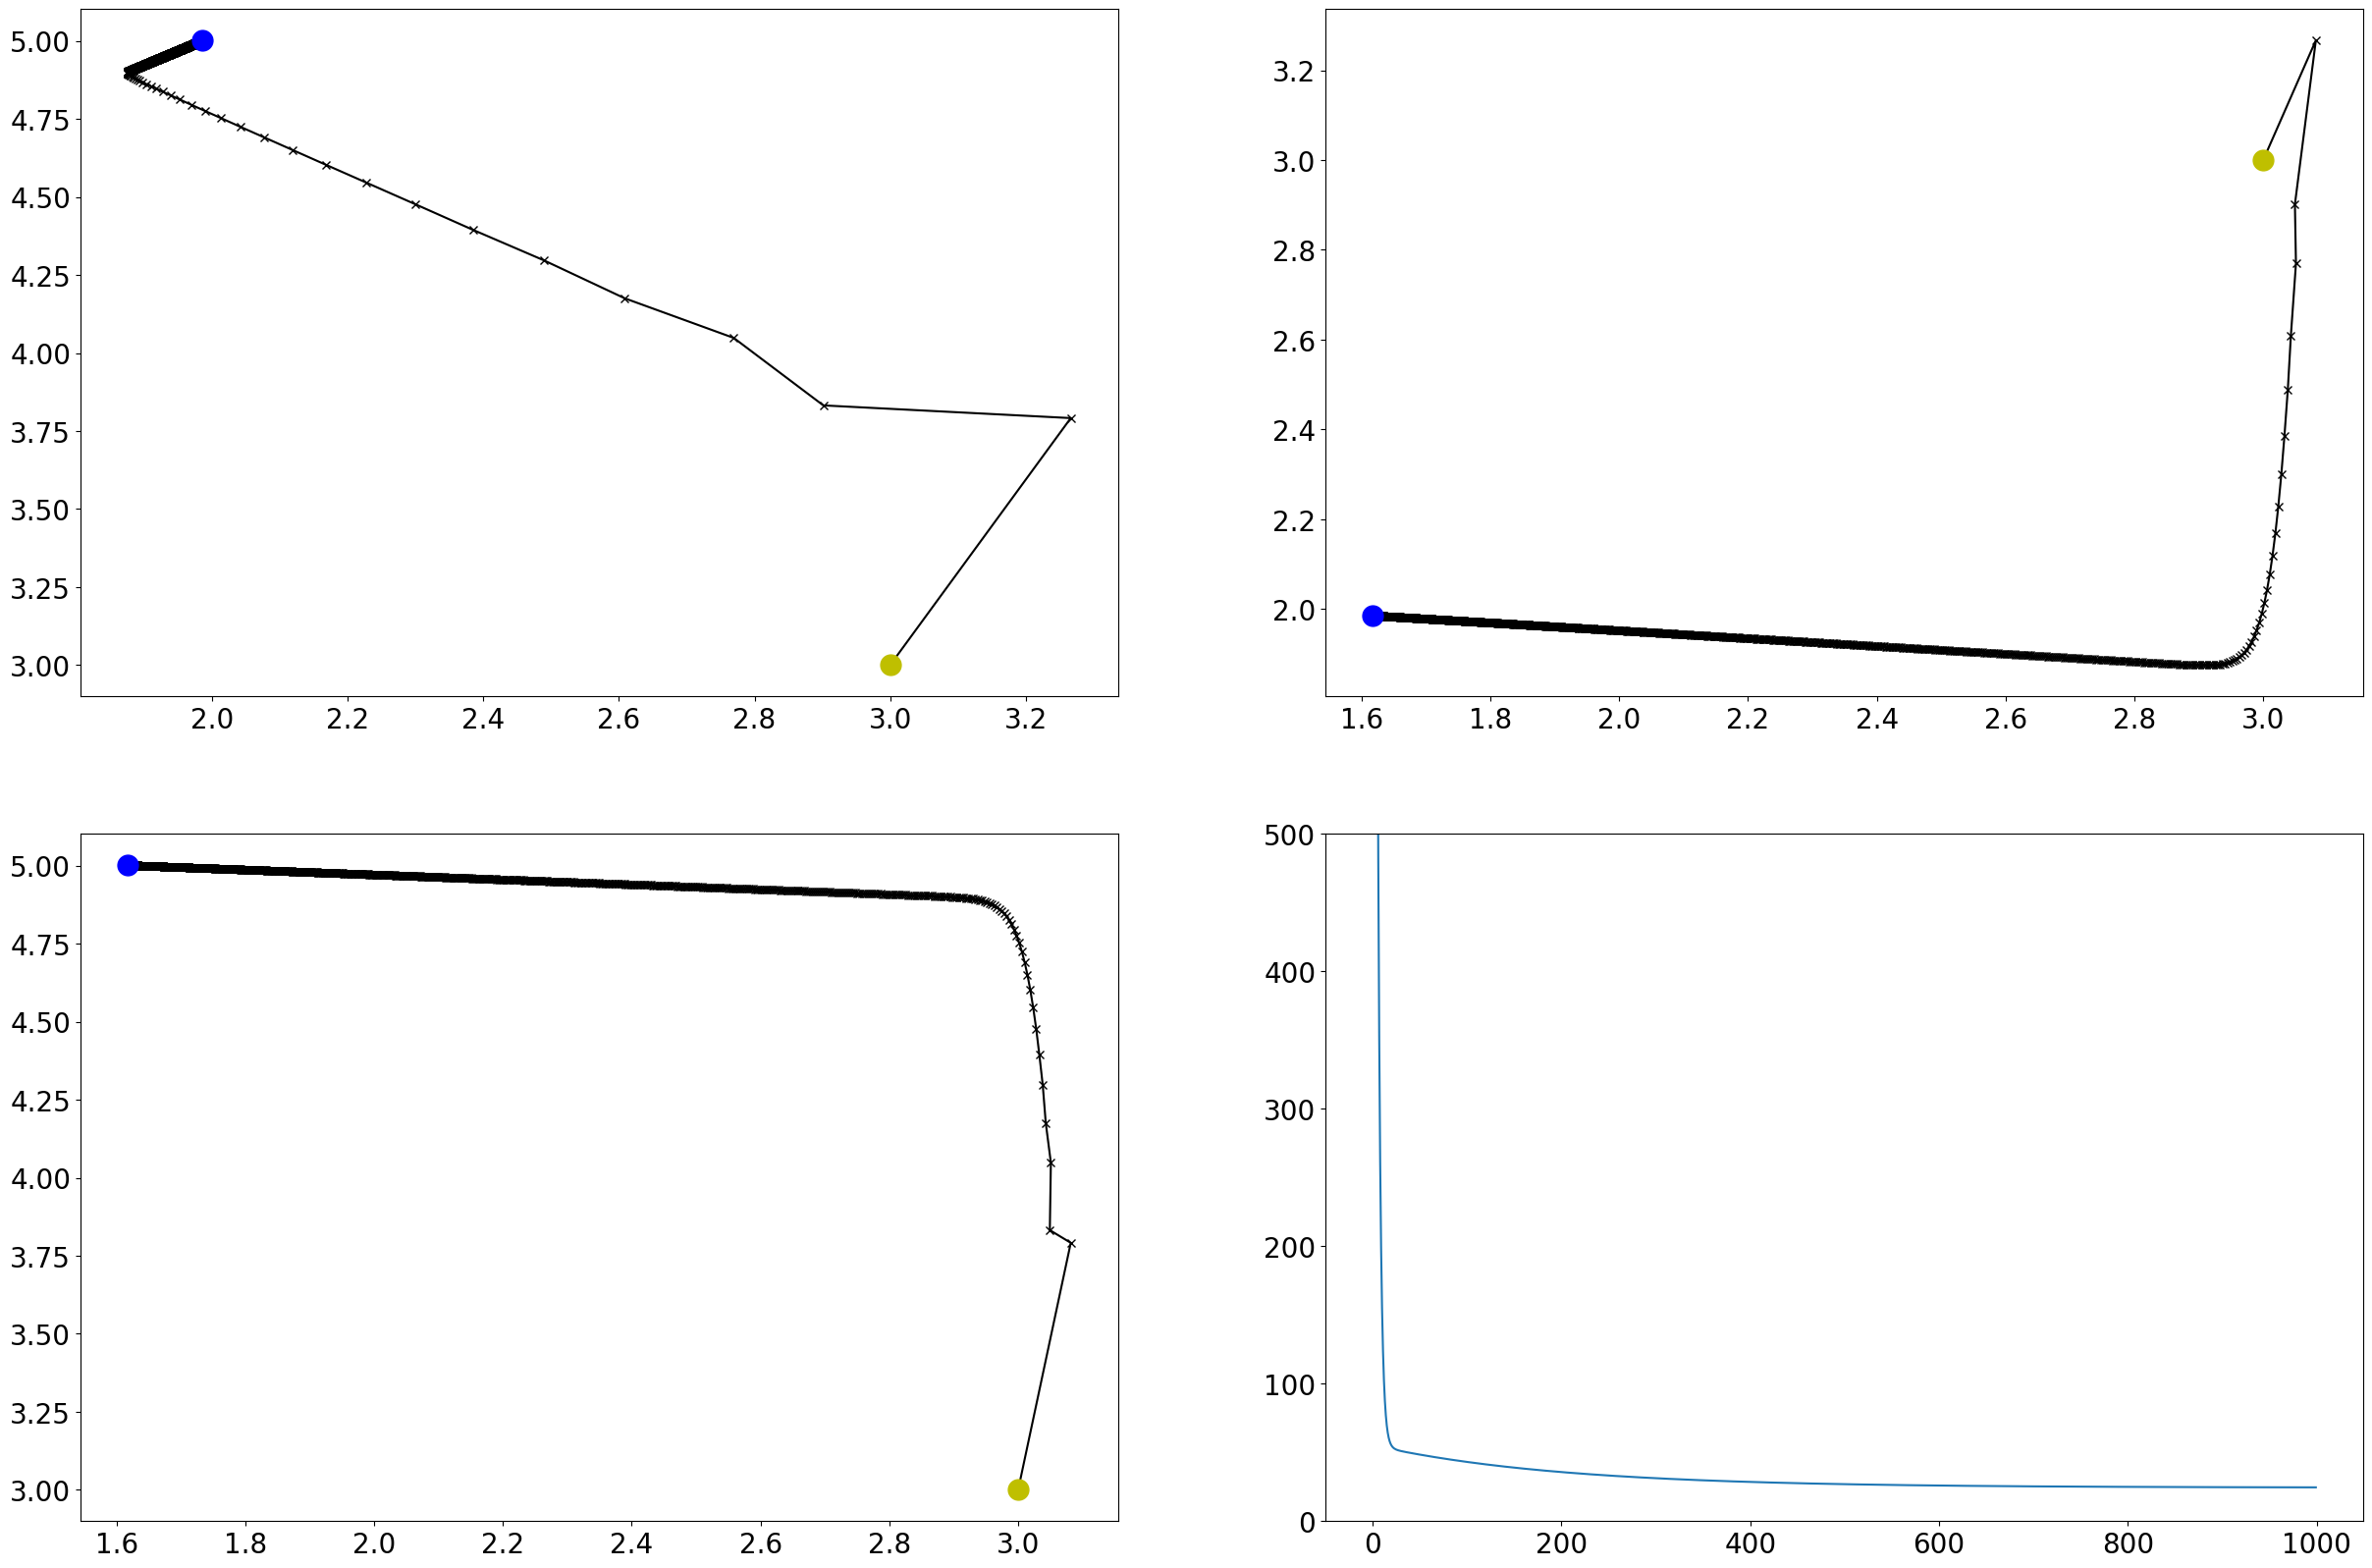

In [32]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## Plot the loss function

### low learning rate use more iteration
### high lr = graph เป็นเส้นตรง
### very low lr = graph เห็นเส้นตรง ปรับ weight น้อยเกินไปจนตามองไม่เห็น
### just right lr + good iteration = graph ลู่เข้า + loss ต่ำ  

## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out.

## Exercise (Stochastic Gradient Descent)
The below code runs Stochastic Gradient descent, but runs through the data in the same order every time.  

1. Run the code and plot the graphs.  What do you notice?
1. Modify the code so that it randomly re-orders the data.  How do the sample trajectories compare? [STUDENT TO COMPLETE THIS]

In [33]:
## Parameters to play with
learning_rate = 2e-4
num_iter = 100   # The number of "steps" will be num_iter * numobs
theta_initial = np.array([3, 3, 3])

In [34]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1, 3))
theta_path[0, :] = theta_initial
loss_vec = np.zeros(num_iter*num_obs)

In [35]:
## Main SGD loop
import random
count = 0
for i in range(num_iter):
    idx = list(range(num_obs))
    random.shuffle(idx)  # Shuffle the indices to get a random order of observations
    for j in range(num_obs):
        j = idx[j]
        count += 1
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[j] - y[j])*(x_mat[j,:])
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta

(0.0, 500.0)

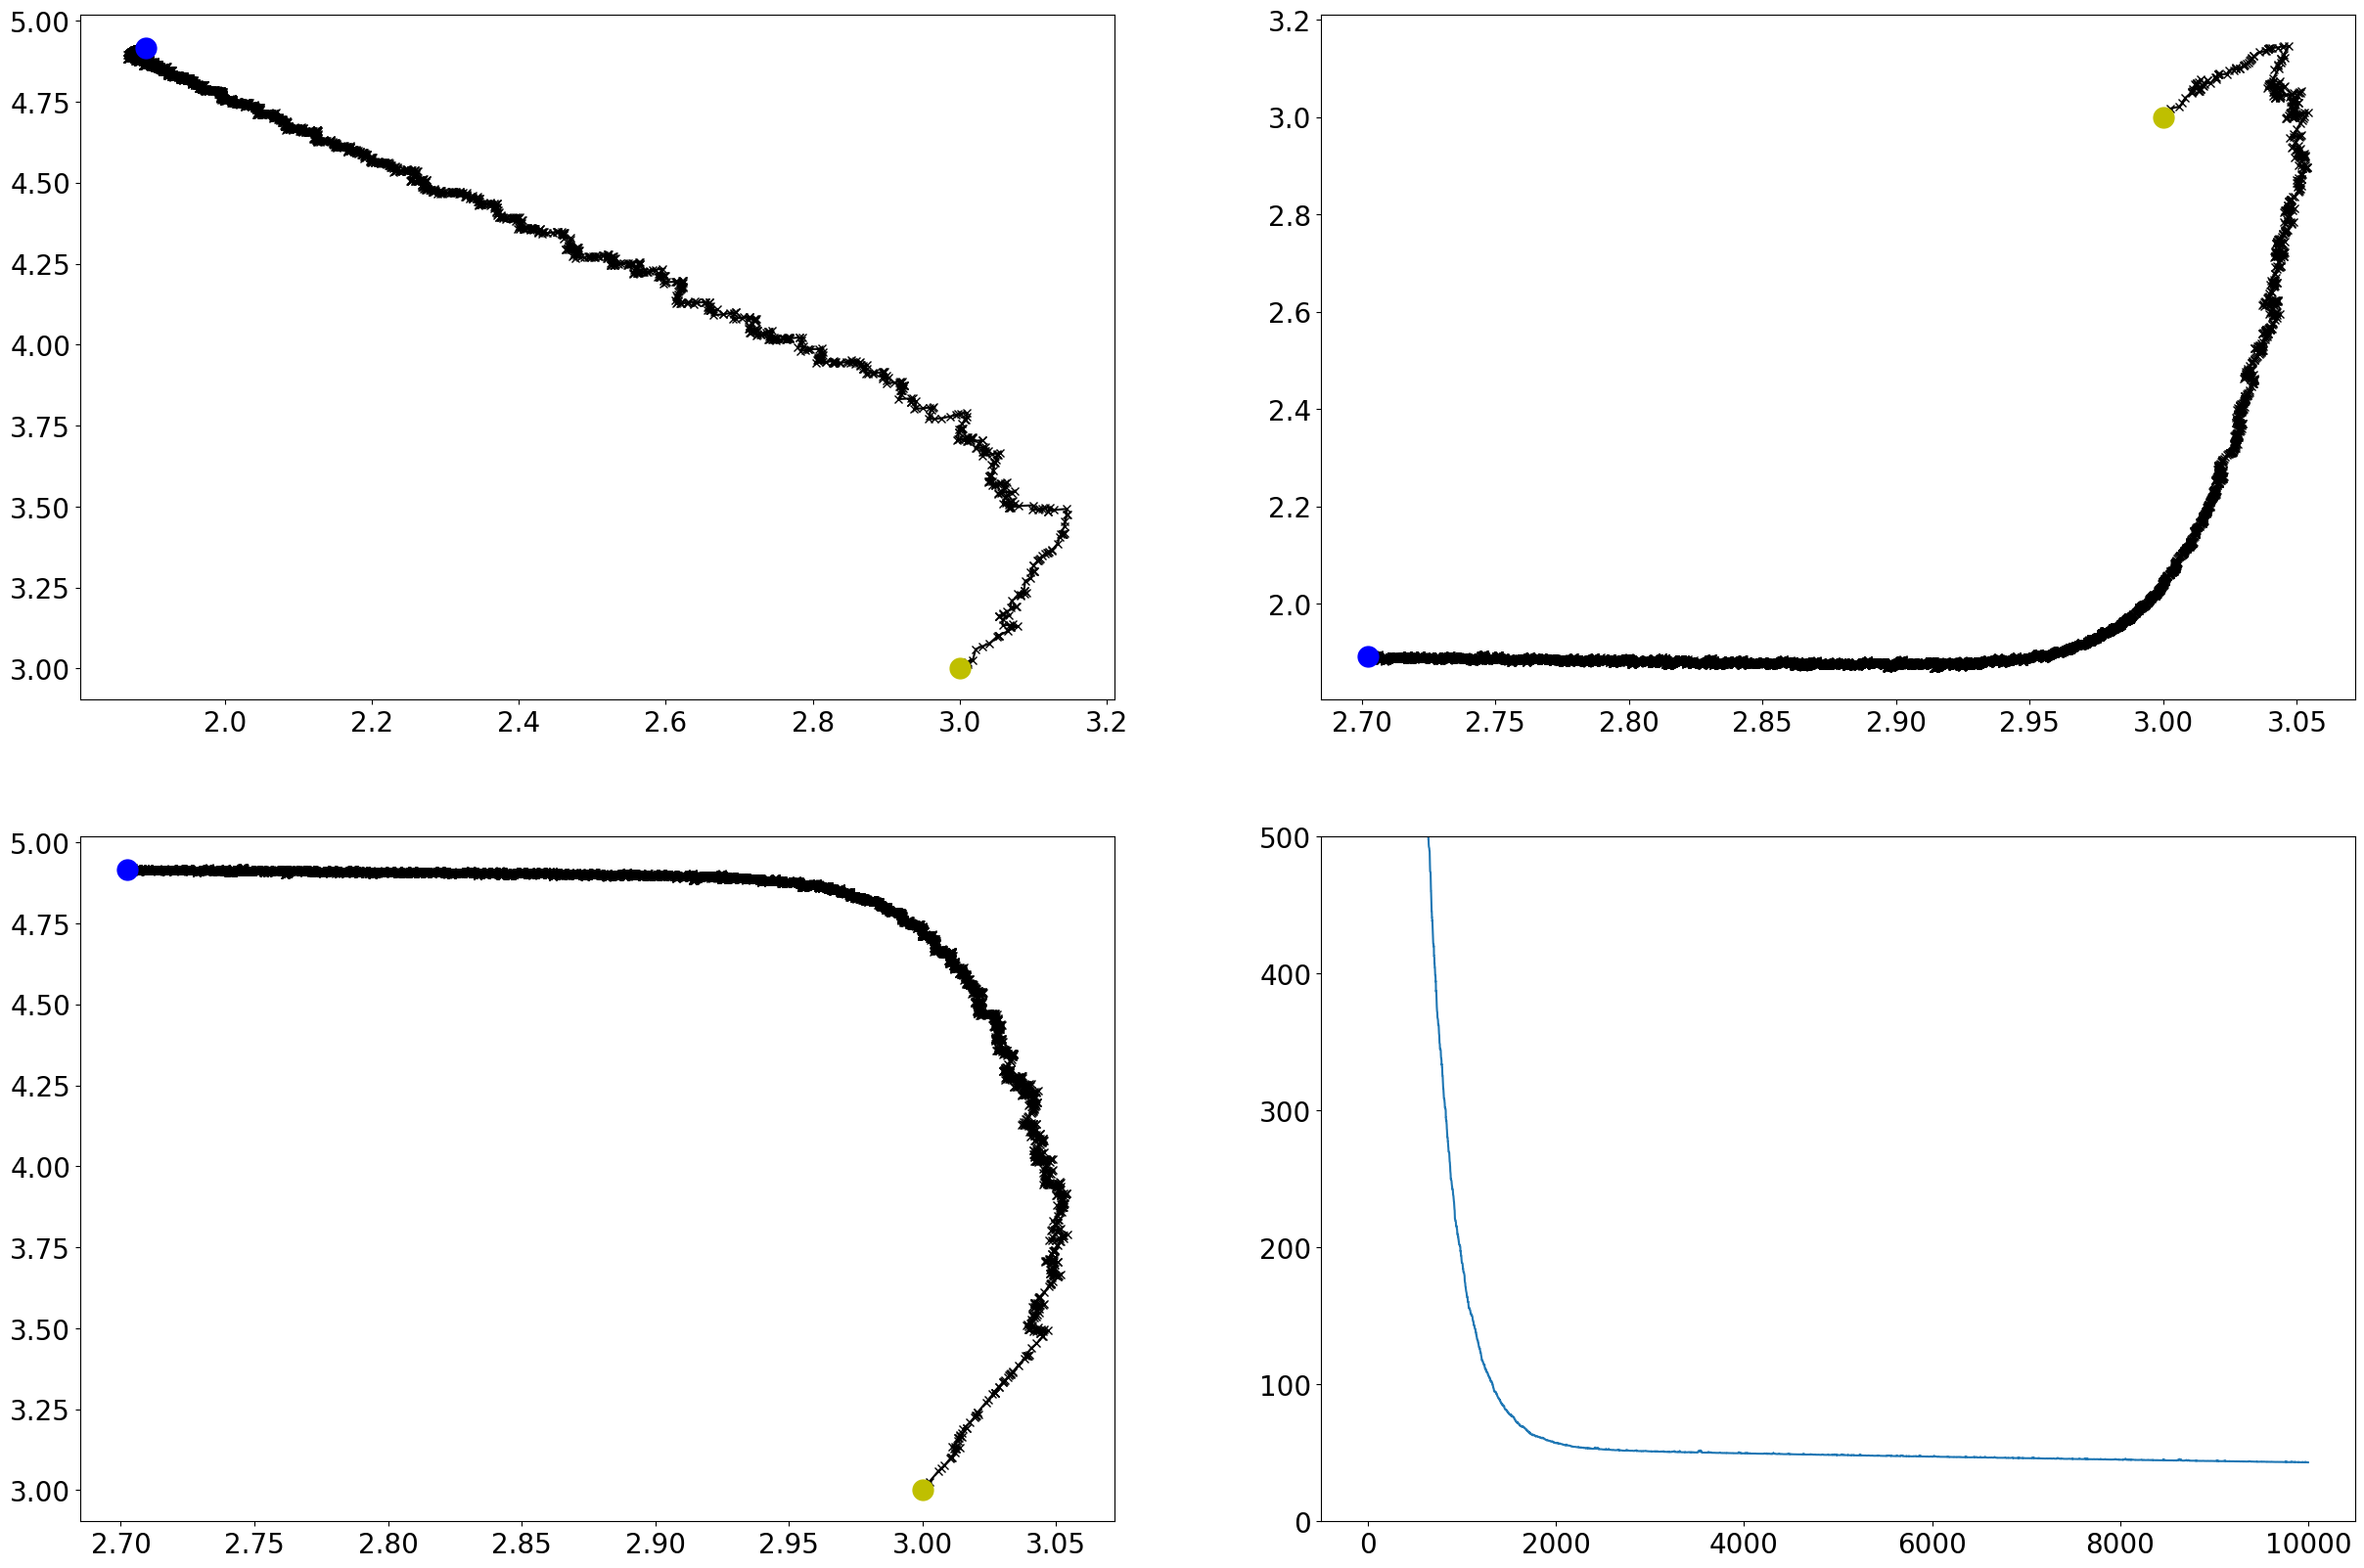

In [36]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

### order = graph มั่ว แบบนึง 
### order = graph มั่ว อีกแบบนึง
### ปรับ learning rate + good iteration = graph ลู่เข้า + loss ต่ำ

## Exercise (Mini Batch Gradient Descent)
The below code runs Mini Batch Gradient Descent.  

1. Pick a batch size, run the code, and then plot the trajectory of your gradient descent.
1. Observe and explain how the batch size affects the trajectory.

In [37]:
## Parameters to play with
learning_rate = 2e-4
num_iter = 1000
batch_size = 10
steps_per_epoch = num_obs // batch_size + int(num_obs % batch_size != 0)
num_epoch = num_iter//steps_per_epoch  # The number of "steps" will be num_iter * num_obs / batch_size
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_epoch*steps_per_epoch)+1, 3))
theta_path[0, :]= theta_initial
loss_vec = np.zeros(num_epoch*steps_per_epoch)

count = 0
idx = np.arange(num_obs)
for i in range(num_epoch):
    np.random.shuffle(idx)
    y     = y[idx]
    x_mat = x_mat[idx]
    for j in range(steps_per_epoch):
        count += 1
        beg = j * batch_size
        end = (j + 1) * batch_size
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[beg:end] - y[beg:end]).dot(x_mat[beg:end, :])/batch_size
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta

(0.0, 500.0)

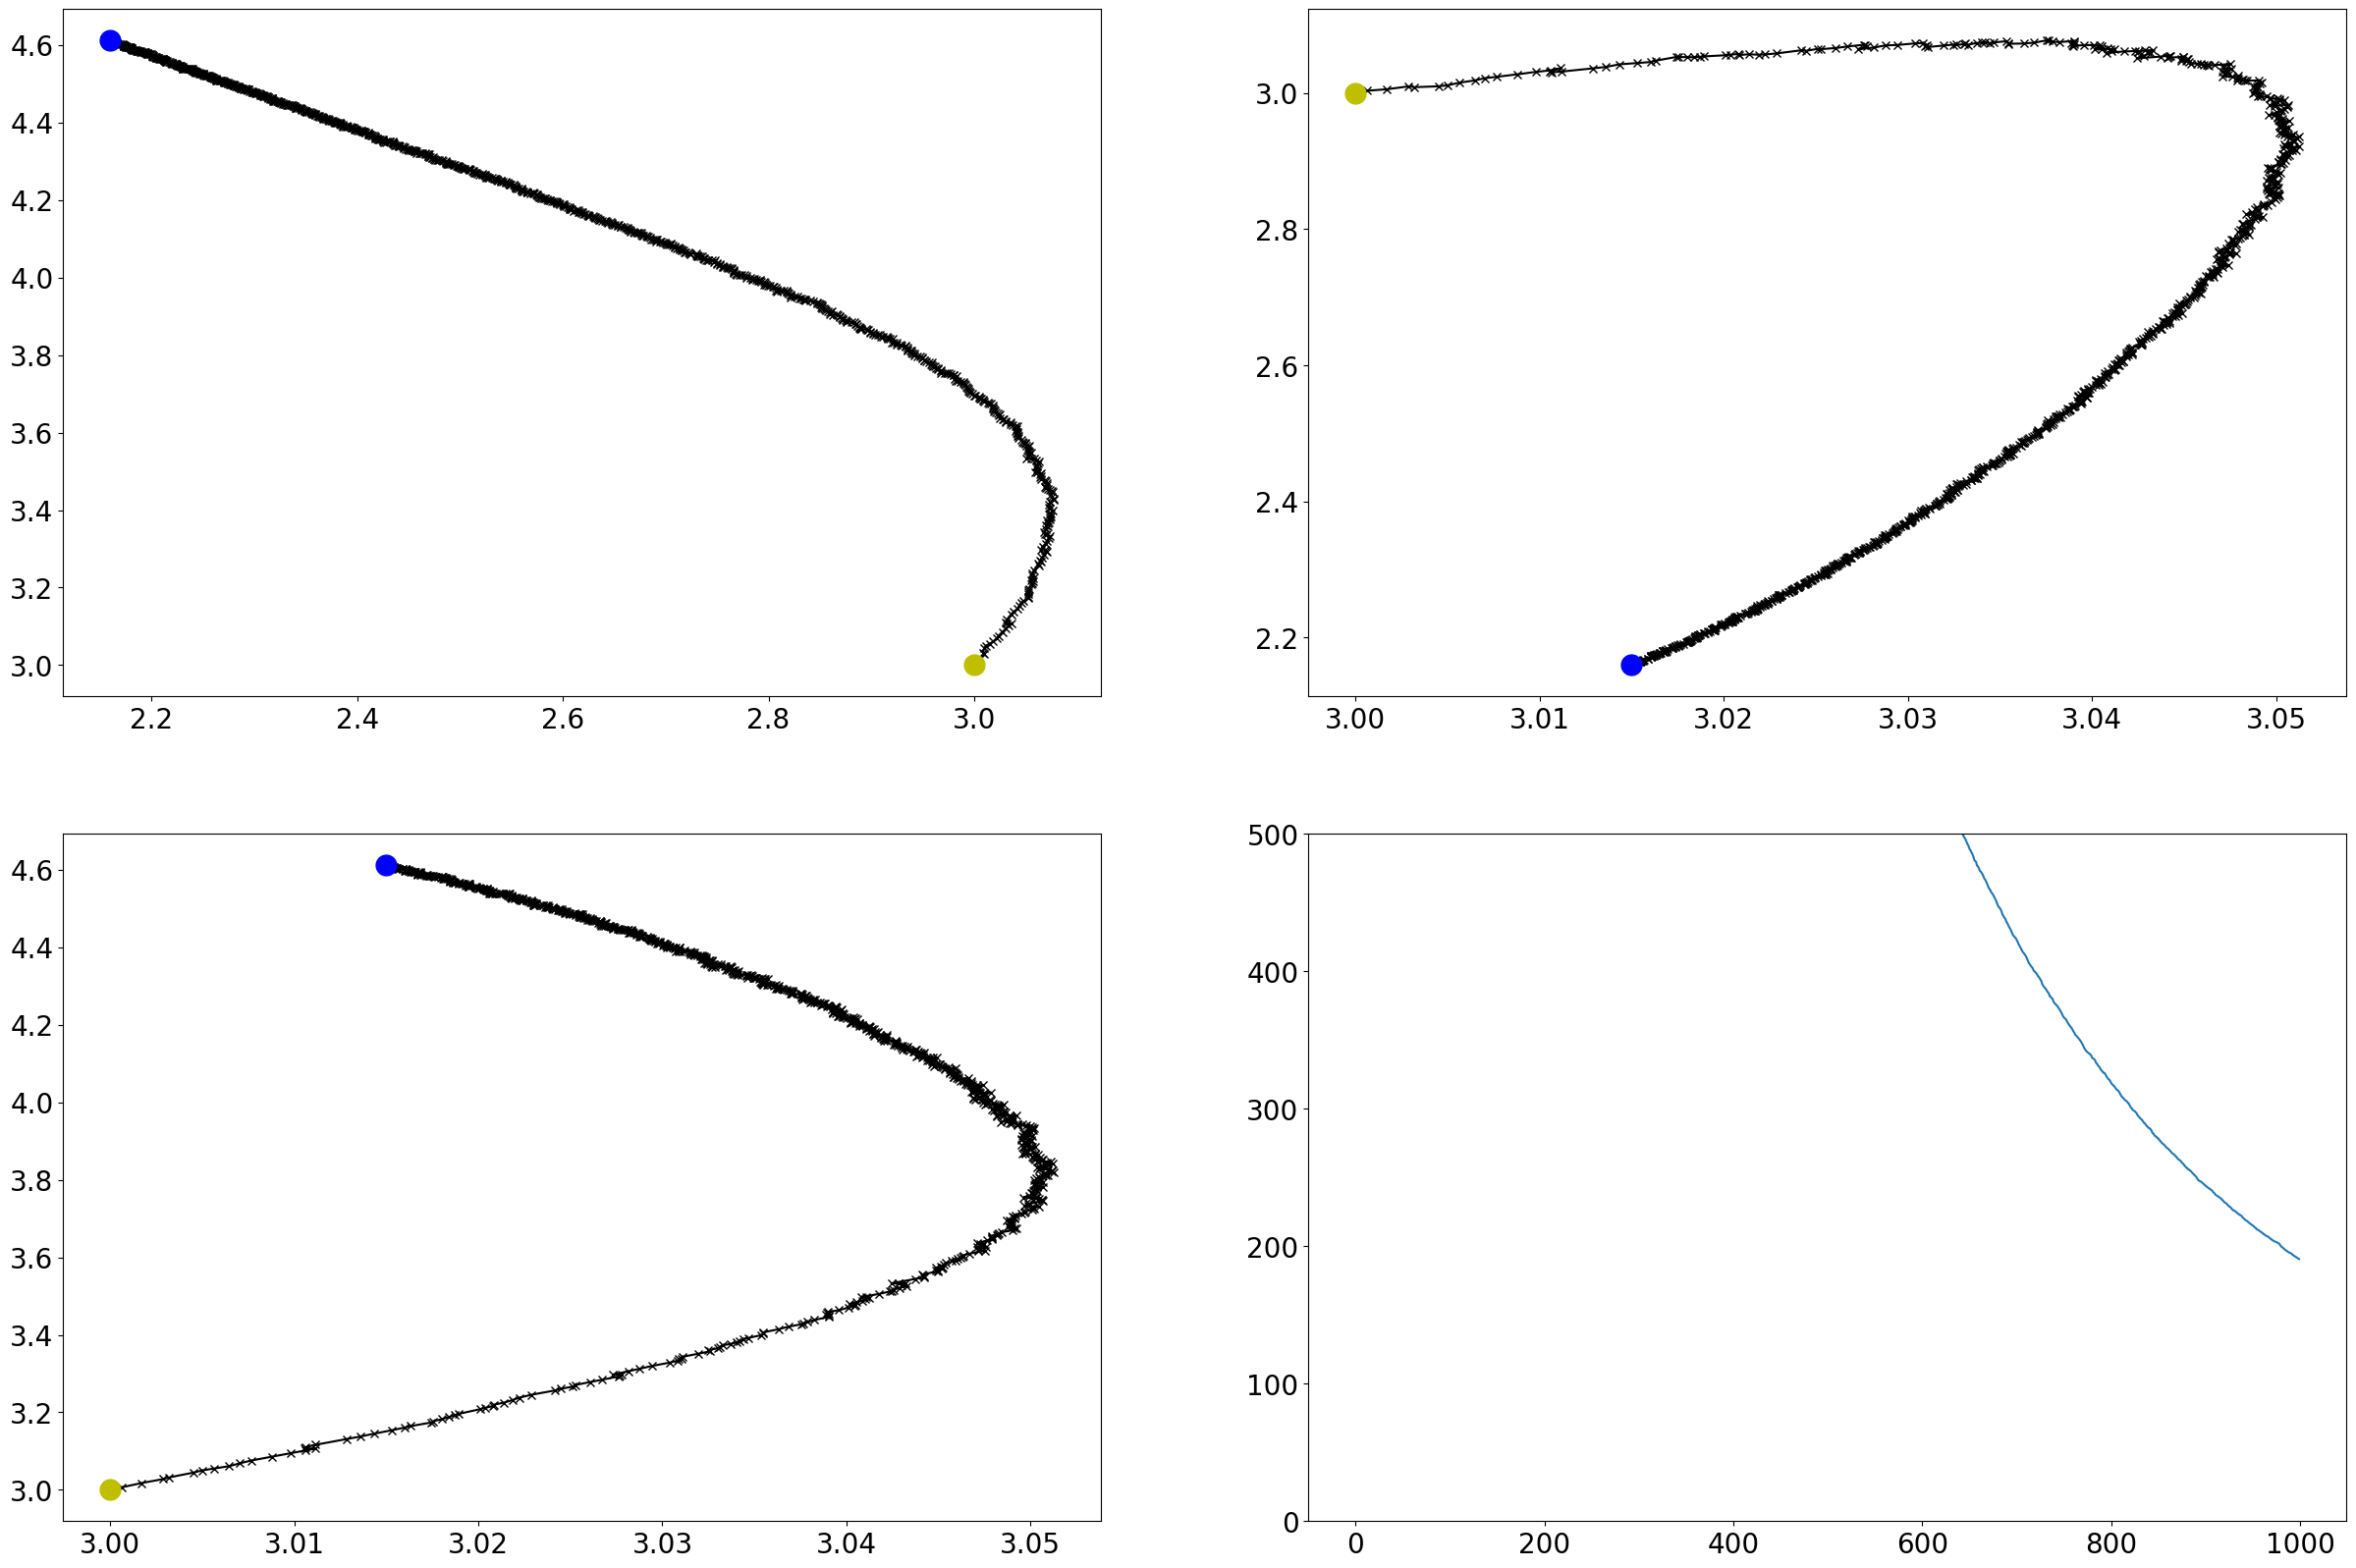

In [38]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

# <span style="color: green;">ให้ปรับโค้ดหรือเพิ่ม Cell ตามรายละเอียดของคำถามแต่ละข้อ แล้วจึงเขียนอธิบายประกอบผลที่ได้</span>





## <span style="color: green;">1. (Gradient Descent - 20 คะแนน) หากค่า learning rate สูงหรือต่ำจนเกินไป มีผลต่อการลู่ของค่าพารามิเตอร์เข้าหาค่าที่เหมาะสมอย่างไร</span>


# high learning rate

(0.0, 500.0)

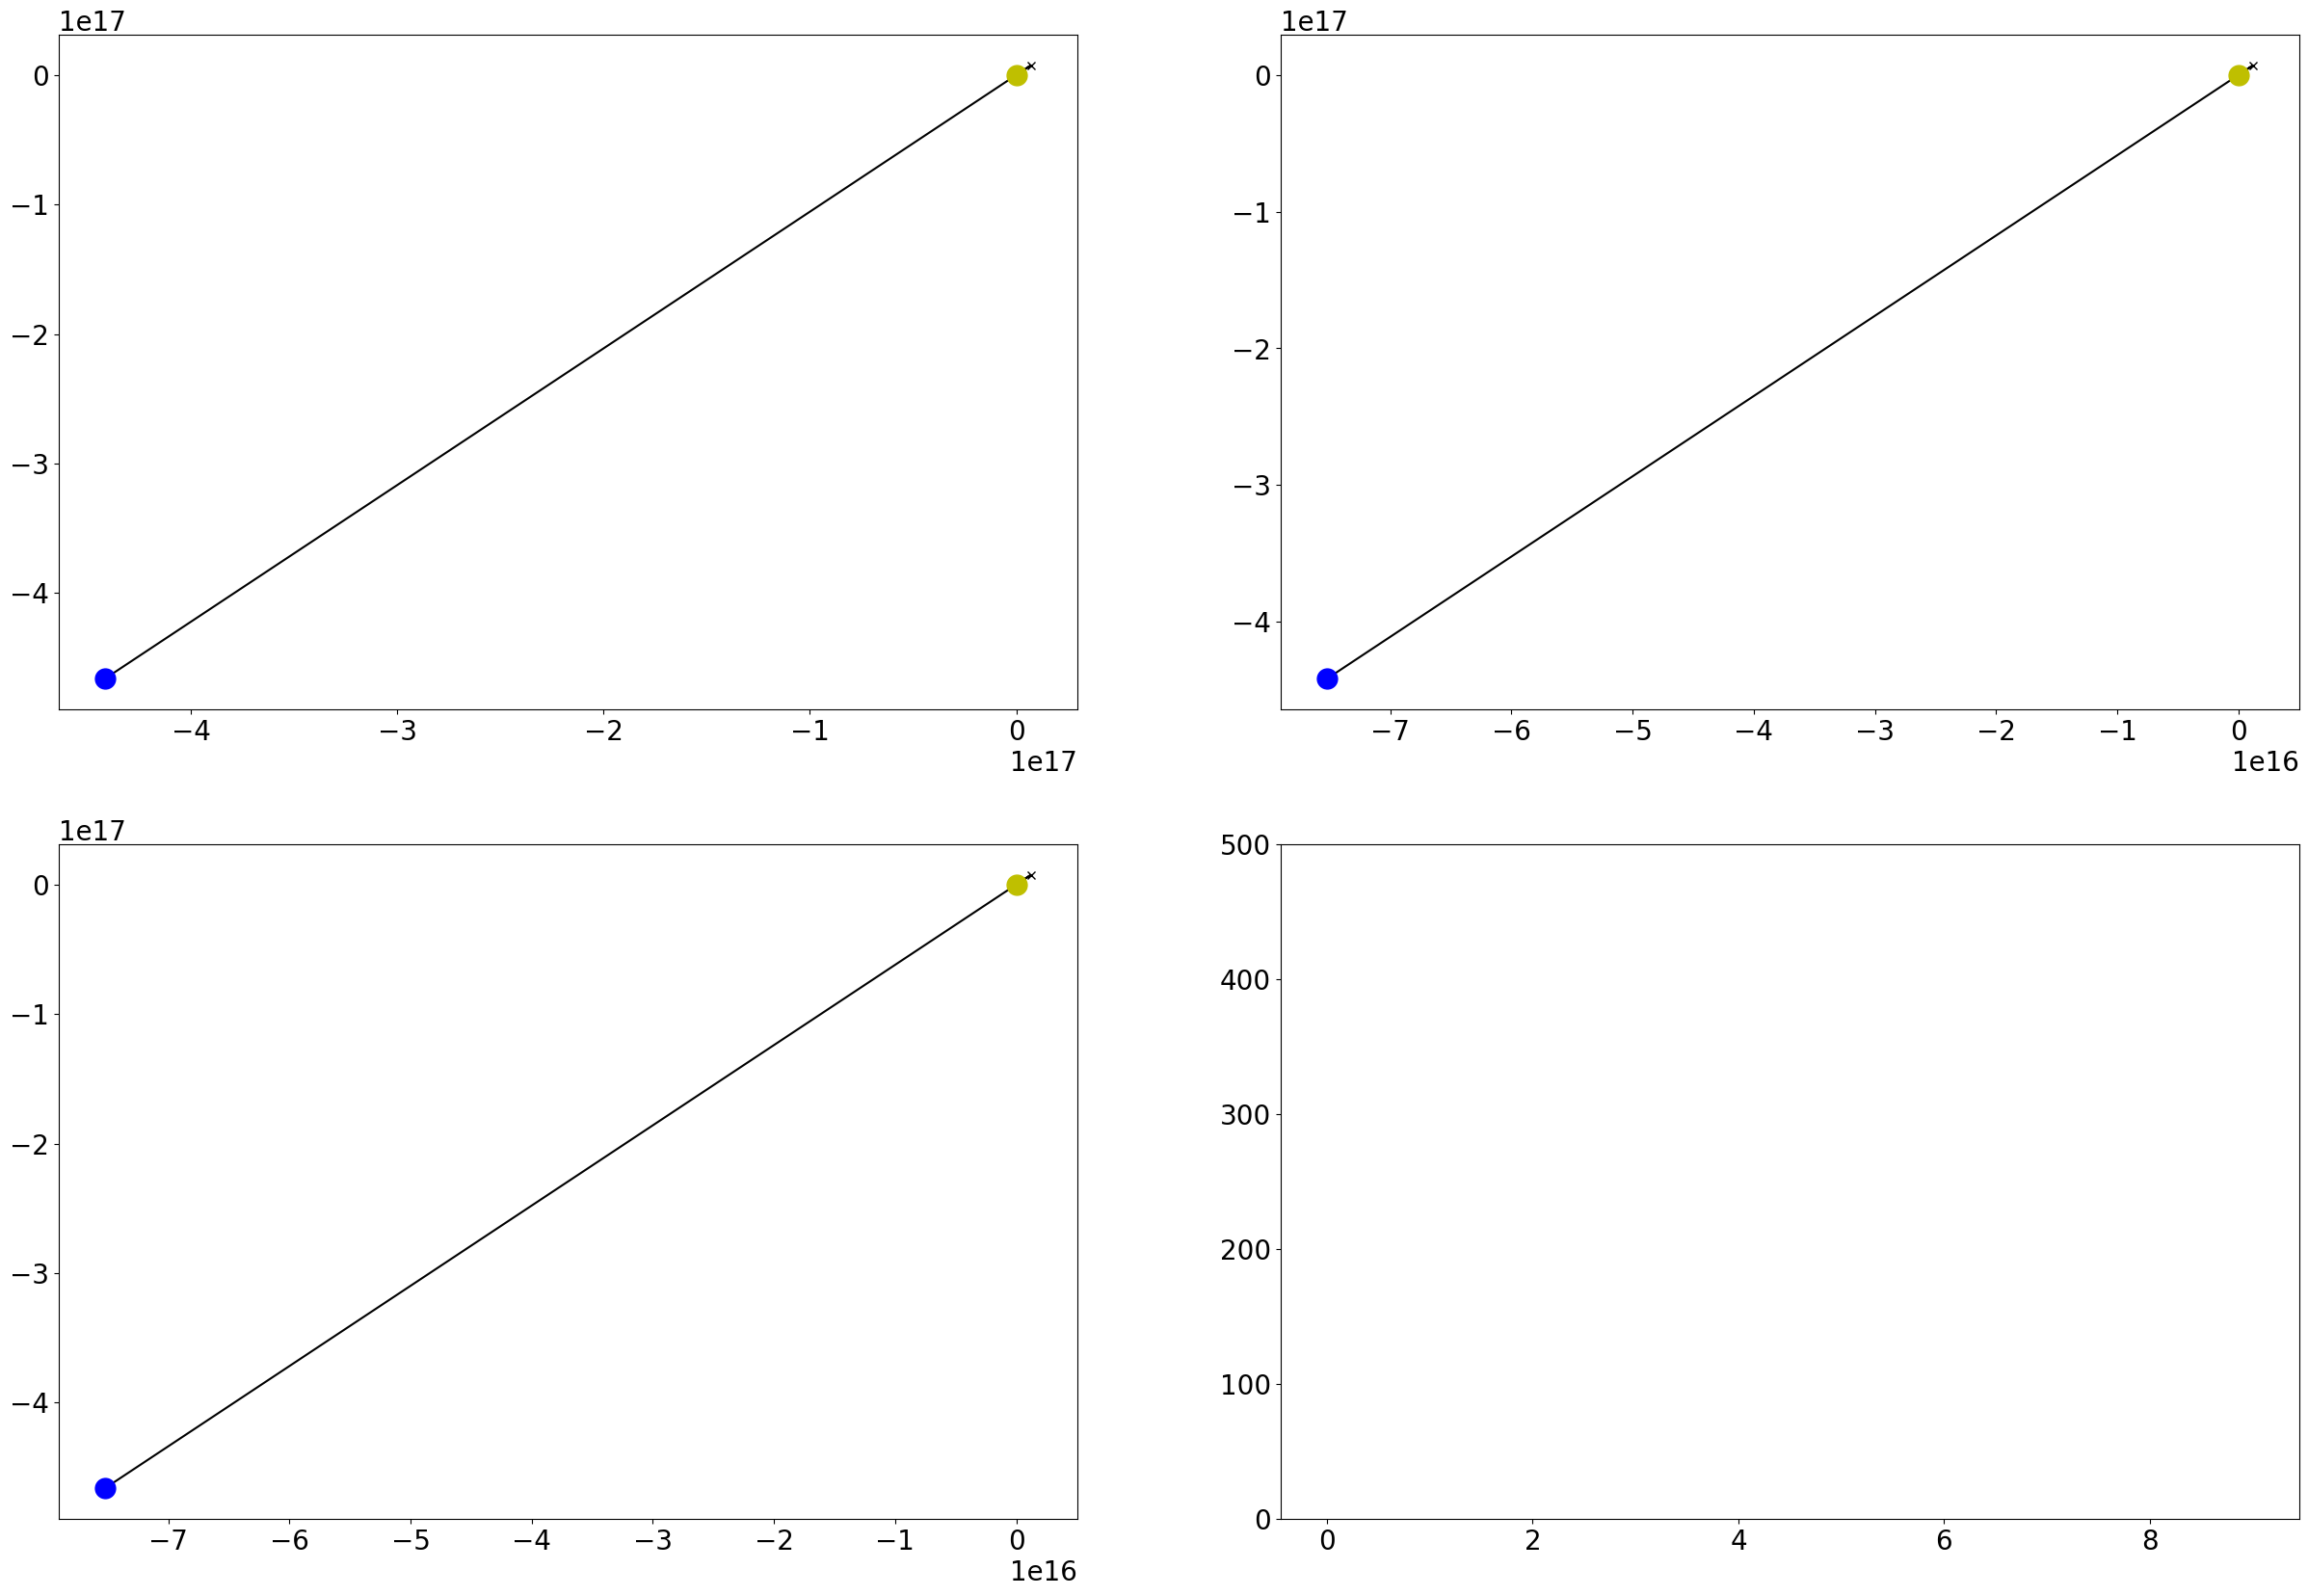

In [44]:
## Parameters to play with
learning_rate = 1
num_iter = 10
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros((num_iter+1, 3))
theta_path[0, :] = theta_initial

loss_vec = np.zeros(num_iter)

## Main Gradient Descent loop (for a fixed number of iterations)
for i in range(num_iter):
    y_pred = np.dot(theta.T, x_mat.T)
    loss_vec[i] = np.sum((y_pred - y)**2)
    grad_vec = (y_pred - y).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
    theta = theta - learning_rate*grad_vec
    theta_path[i+1, :] = theta

## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## Plot the loss function

# low learning rate

(0.0, 500.0)

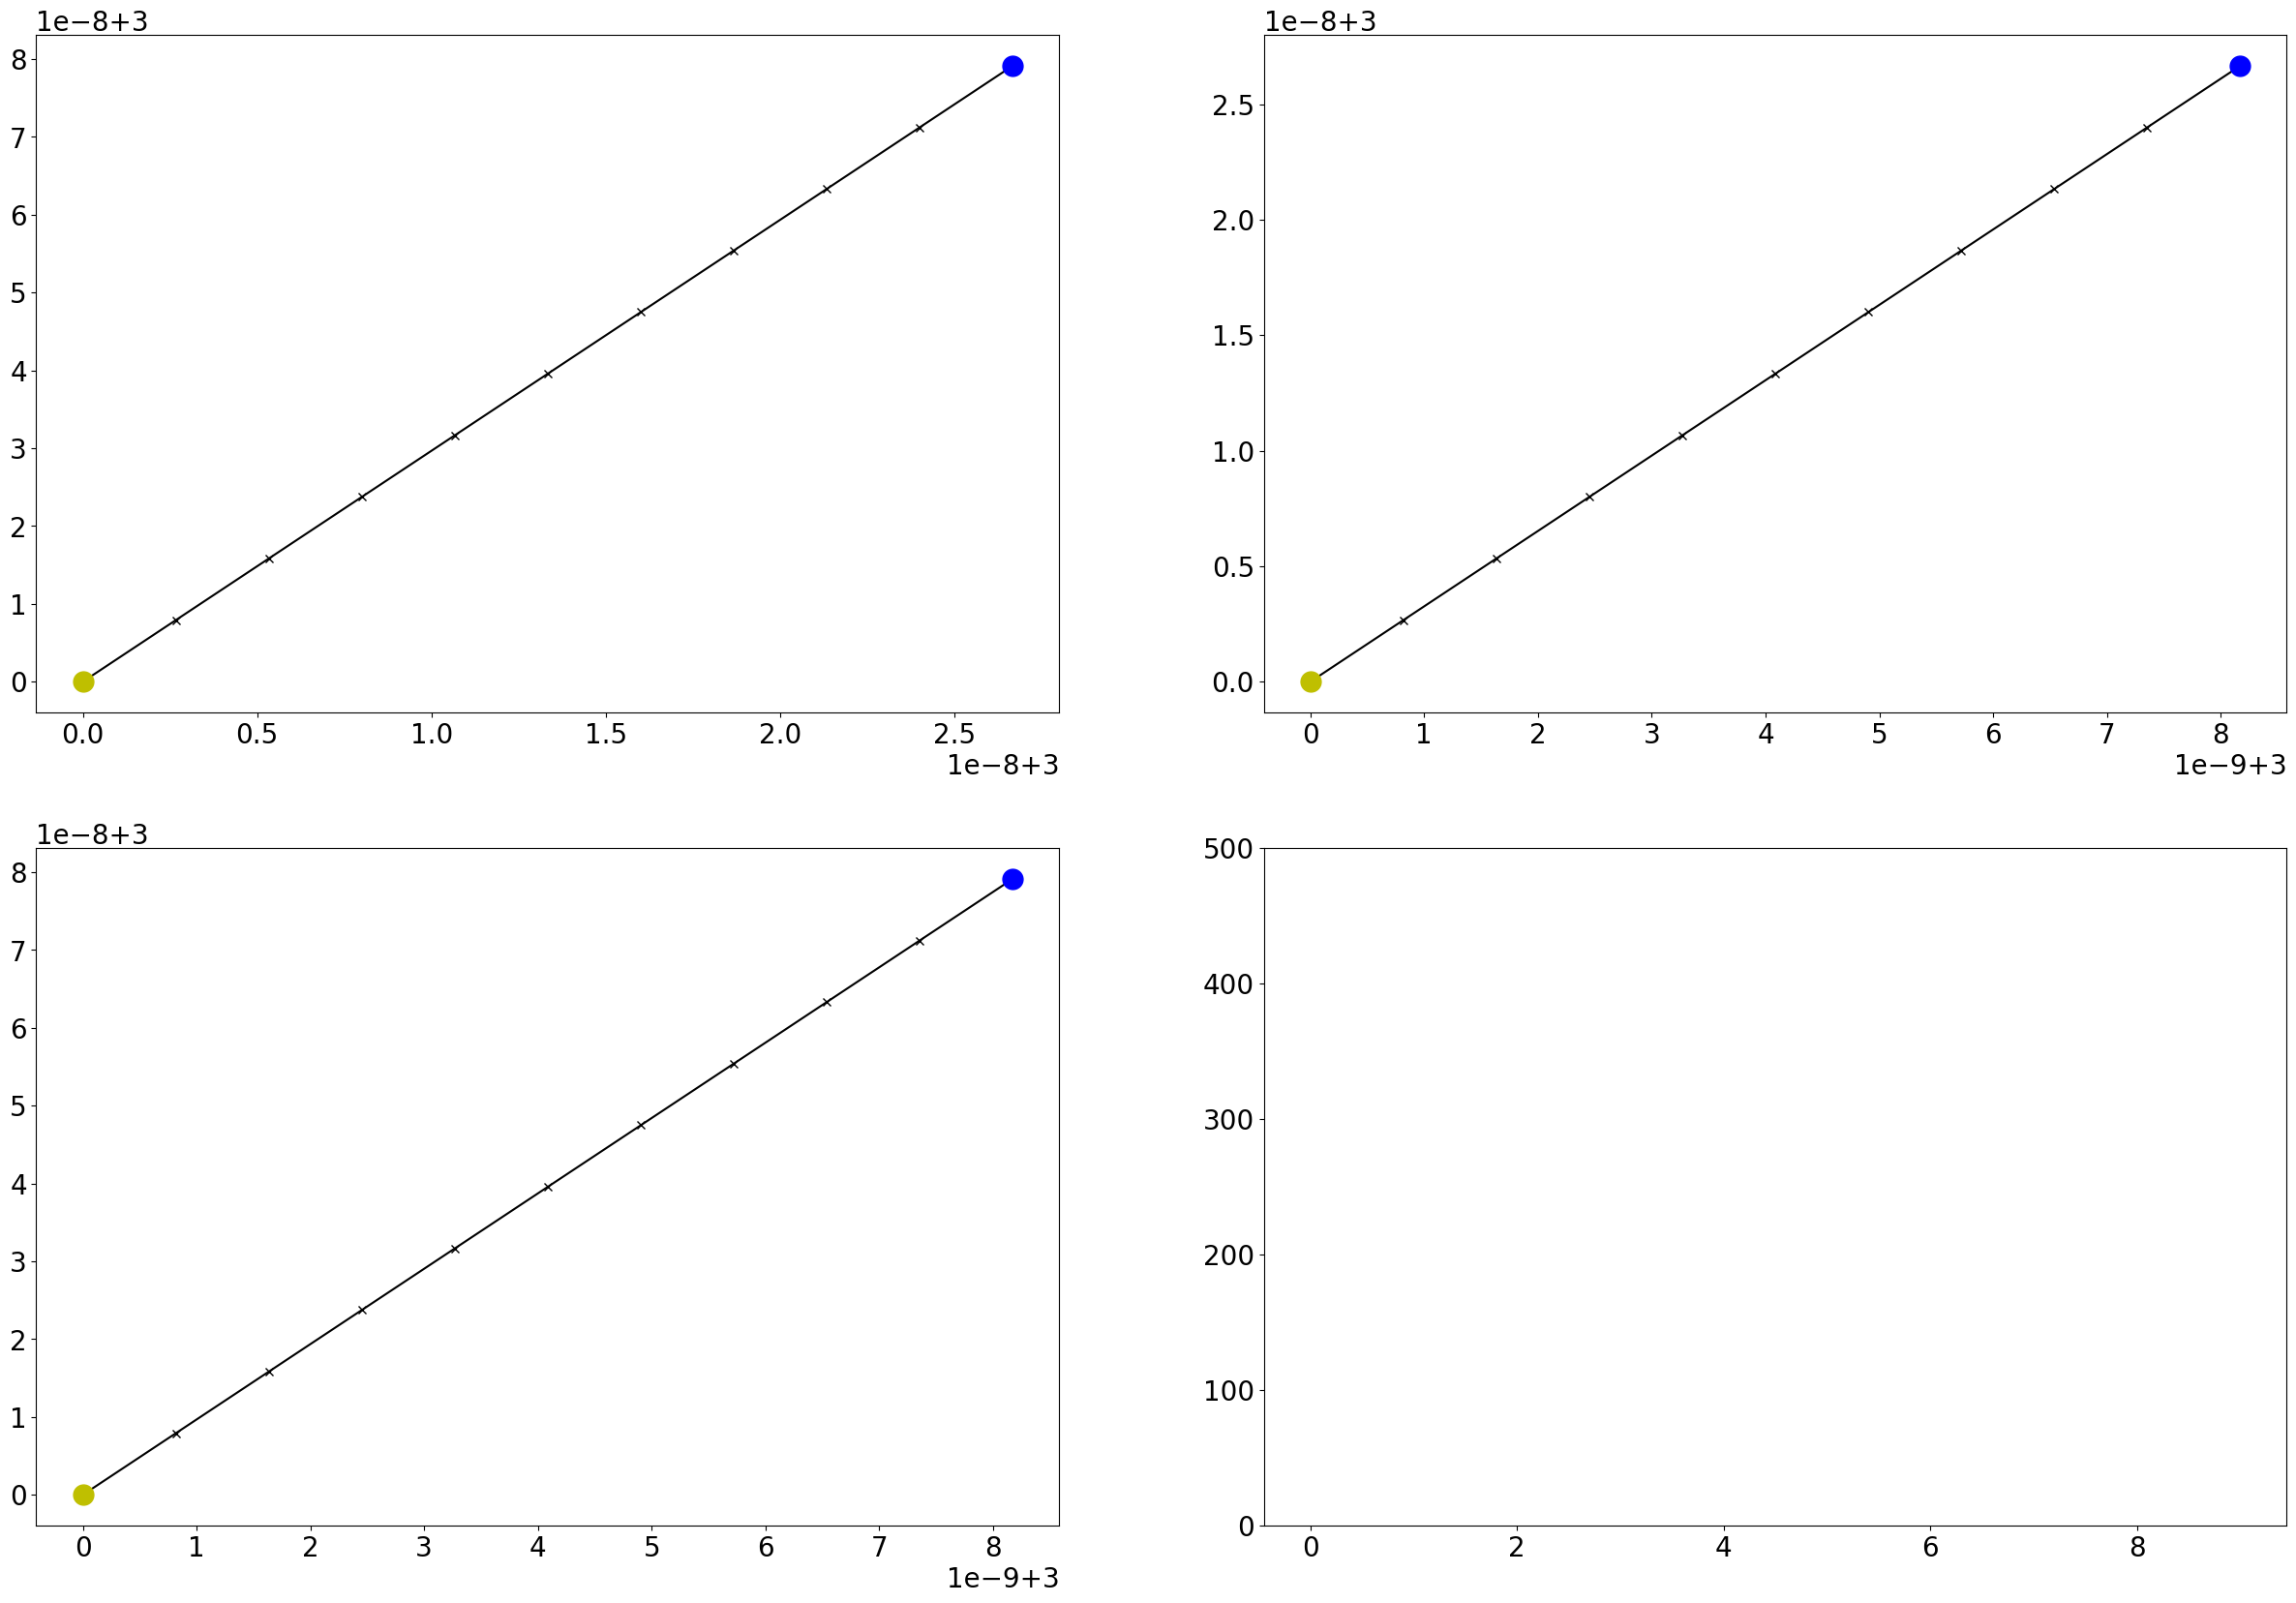

In [45]:
## Parameters to play with
learning_rate = 2e-10
num_iter = 10
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros((num_iter+1, 3))
theta_path[0, :] = theta_initial

loss_vec = np.zeros(num_iter)

## Main Gradient Descent loop (for a fixed number of iterations)
for i in range(num_iter):
    y_pred = np.dot(theta.T, x_mat.T)
    loss_vec[i] = np.sum((y_pred - y)**2)
    grad_vec = (y_pred - y).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
    theta = theta - learning_rate*grad_vec
    theta_path[i+1, :] = theta

## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## Plot the loss function

## 1. ตอบ
### learning rate สูง - ทำให้ ปรับ weigthให้สูงหรือต่ำเกิน จนกระโดดข้าม minimum point, ซึ่งทำให้ model ไม่สามารถ generalize หรือลู่เข้าได้ และอาจทำให้ loss เพิ่มขึ้น
### learning rate ต่ำ - ทำให้ลู่เข้าช้า,ติดอยู่ใน local minima,จึงต้องปรับ iterationให้เยอะ, ซึ่งเปลืองทรัพยากร

## <span style="color: green;">2. (Stochastic Gradient Descent - 20 คะแนน) ในแต่ละรอบการคำนวณ การสลับลำดับของข้อมูลที่ใช้ในการหาค่า gradient ส่งผลต่อกราฟ loss อย่างไร เมื่อเทียบกับหากไม่ได้สลับลำดับข้อมูล</span>

# shuffle

(0.0, 500.0)

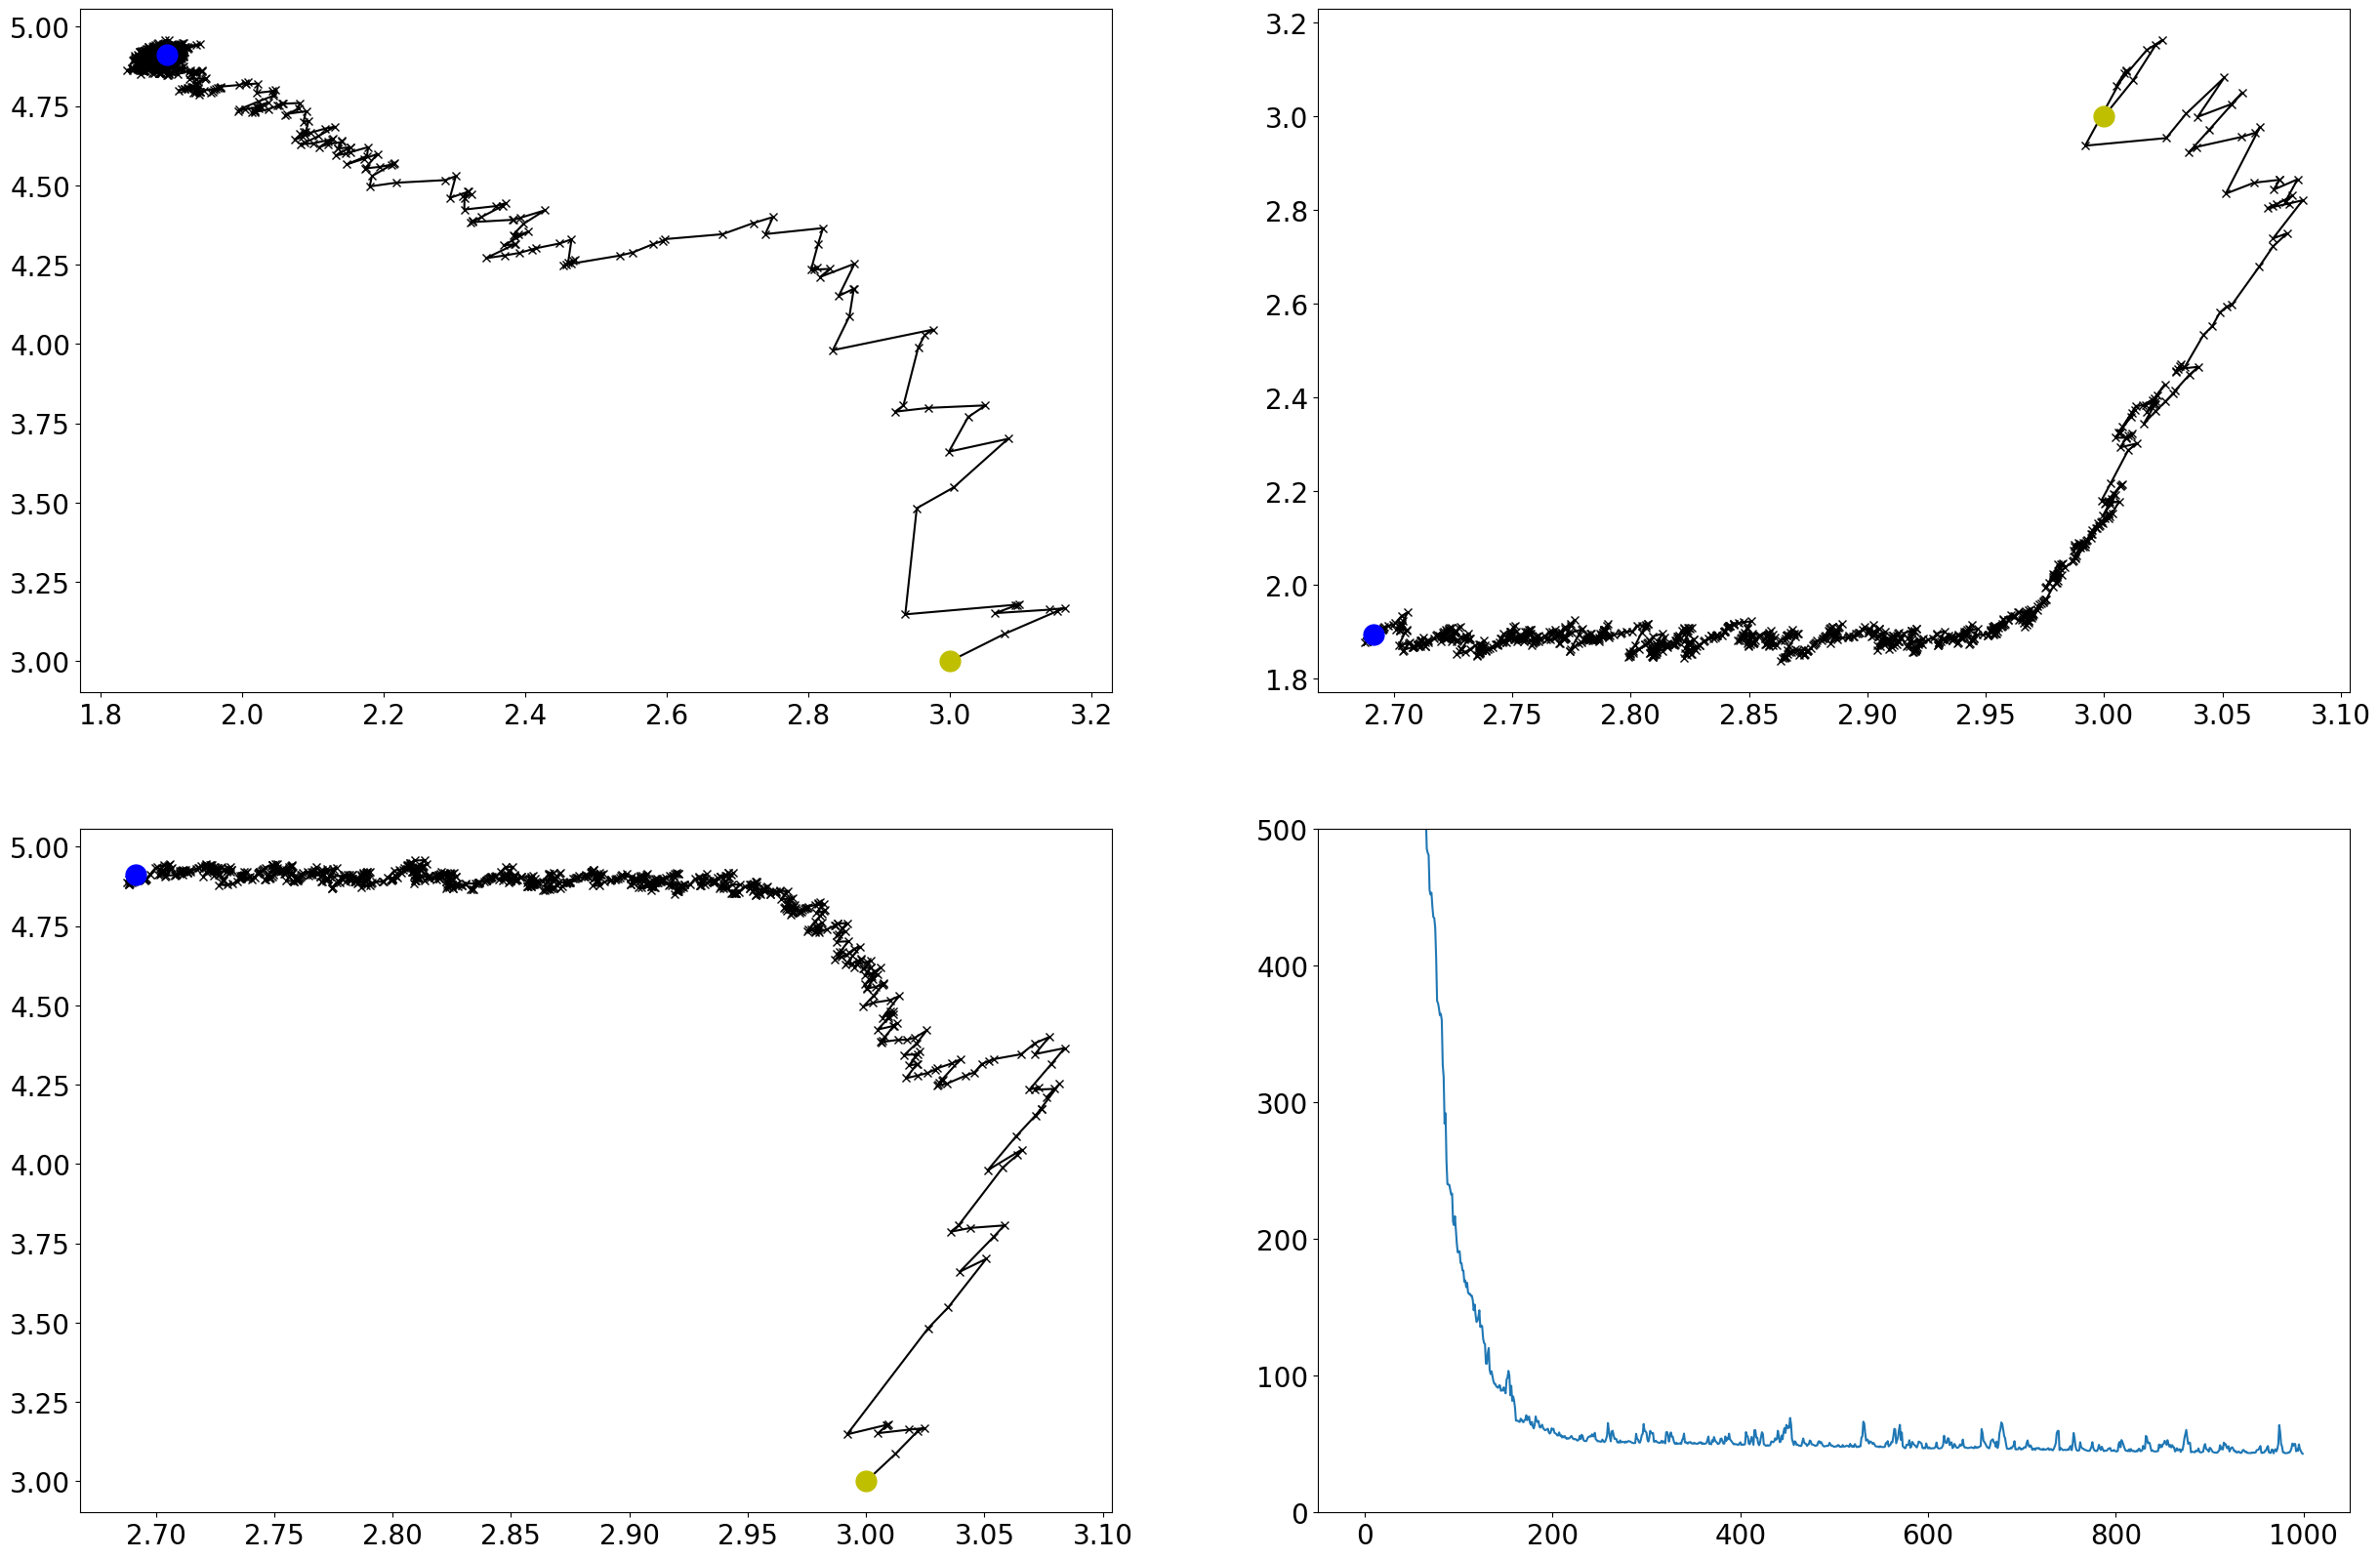

In [50]:
## Parameters to play with
learning_rate = 2e-3
num_iter = 10   # The number of "steps" will be num_iter * numobs
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1, 3))
theta_path[0, :] = theta_initial
loss_vec = np.zeros(num_iter*num_obs)

## Main SGD loop
import random
count = 0
for i in range(num_iter):
    idx = list(range(num_obs))
    random.shuffle(idx)  # Shuffle the indices to get a random order of observations
    for j in range(num_obs):
        j = idx[j]
        count += 1
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[j] - y[j])*(x_mat[j,:])
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta


## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

# no shuffle

(0.0, 500.0)

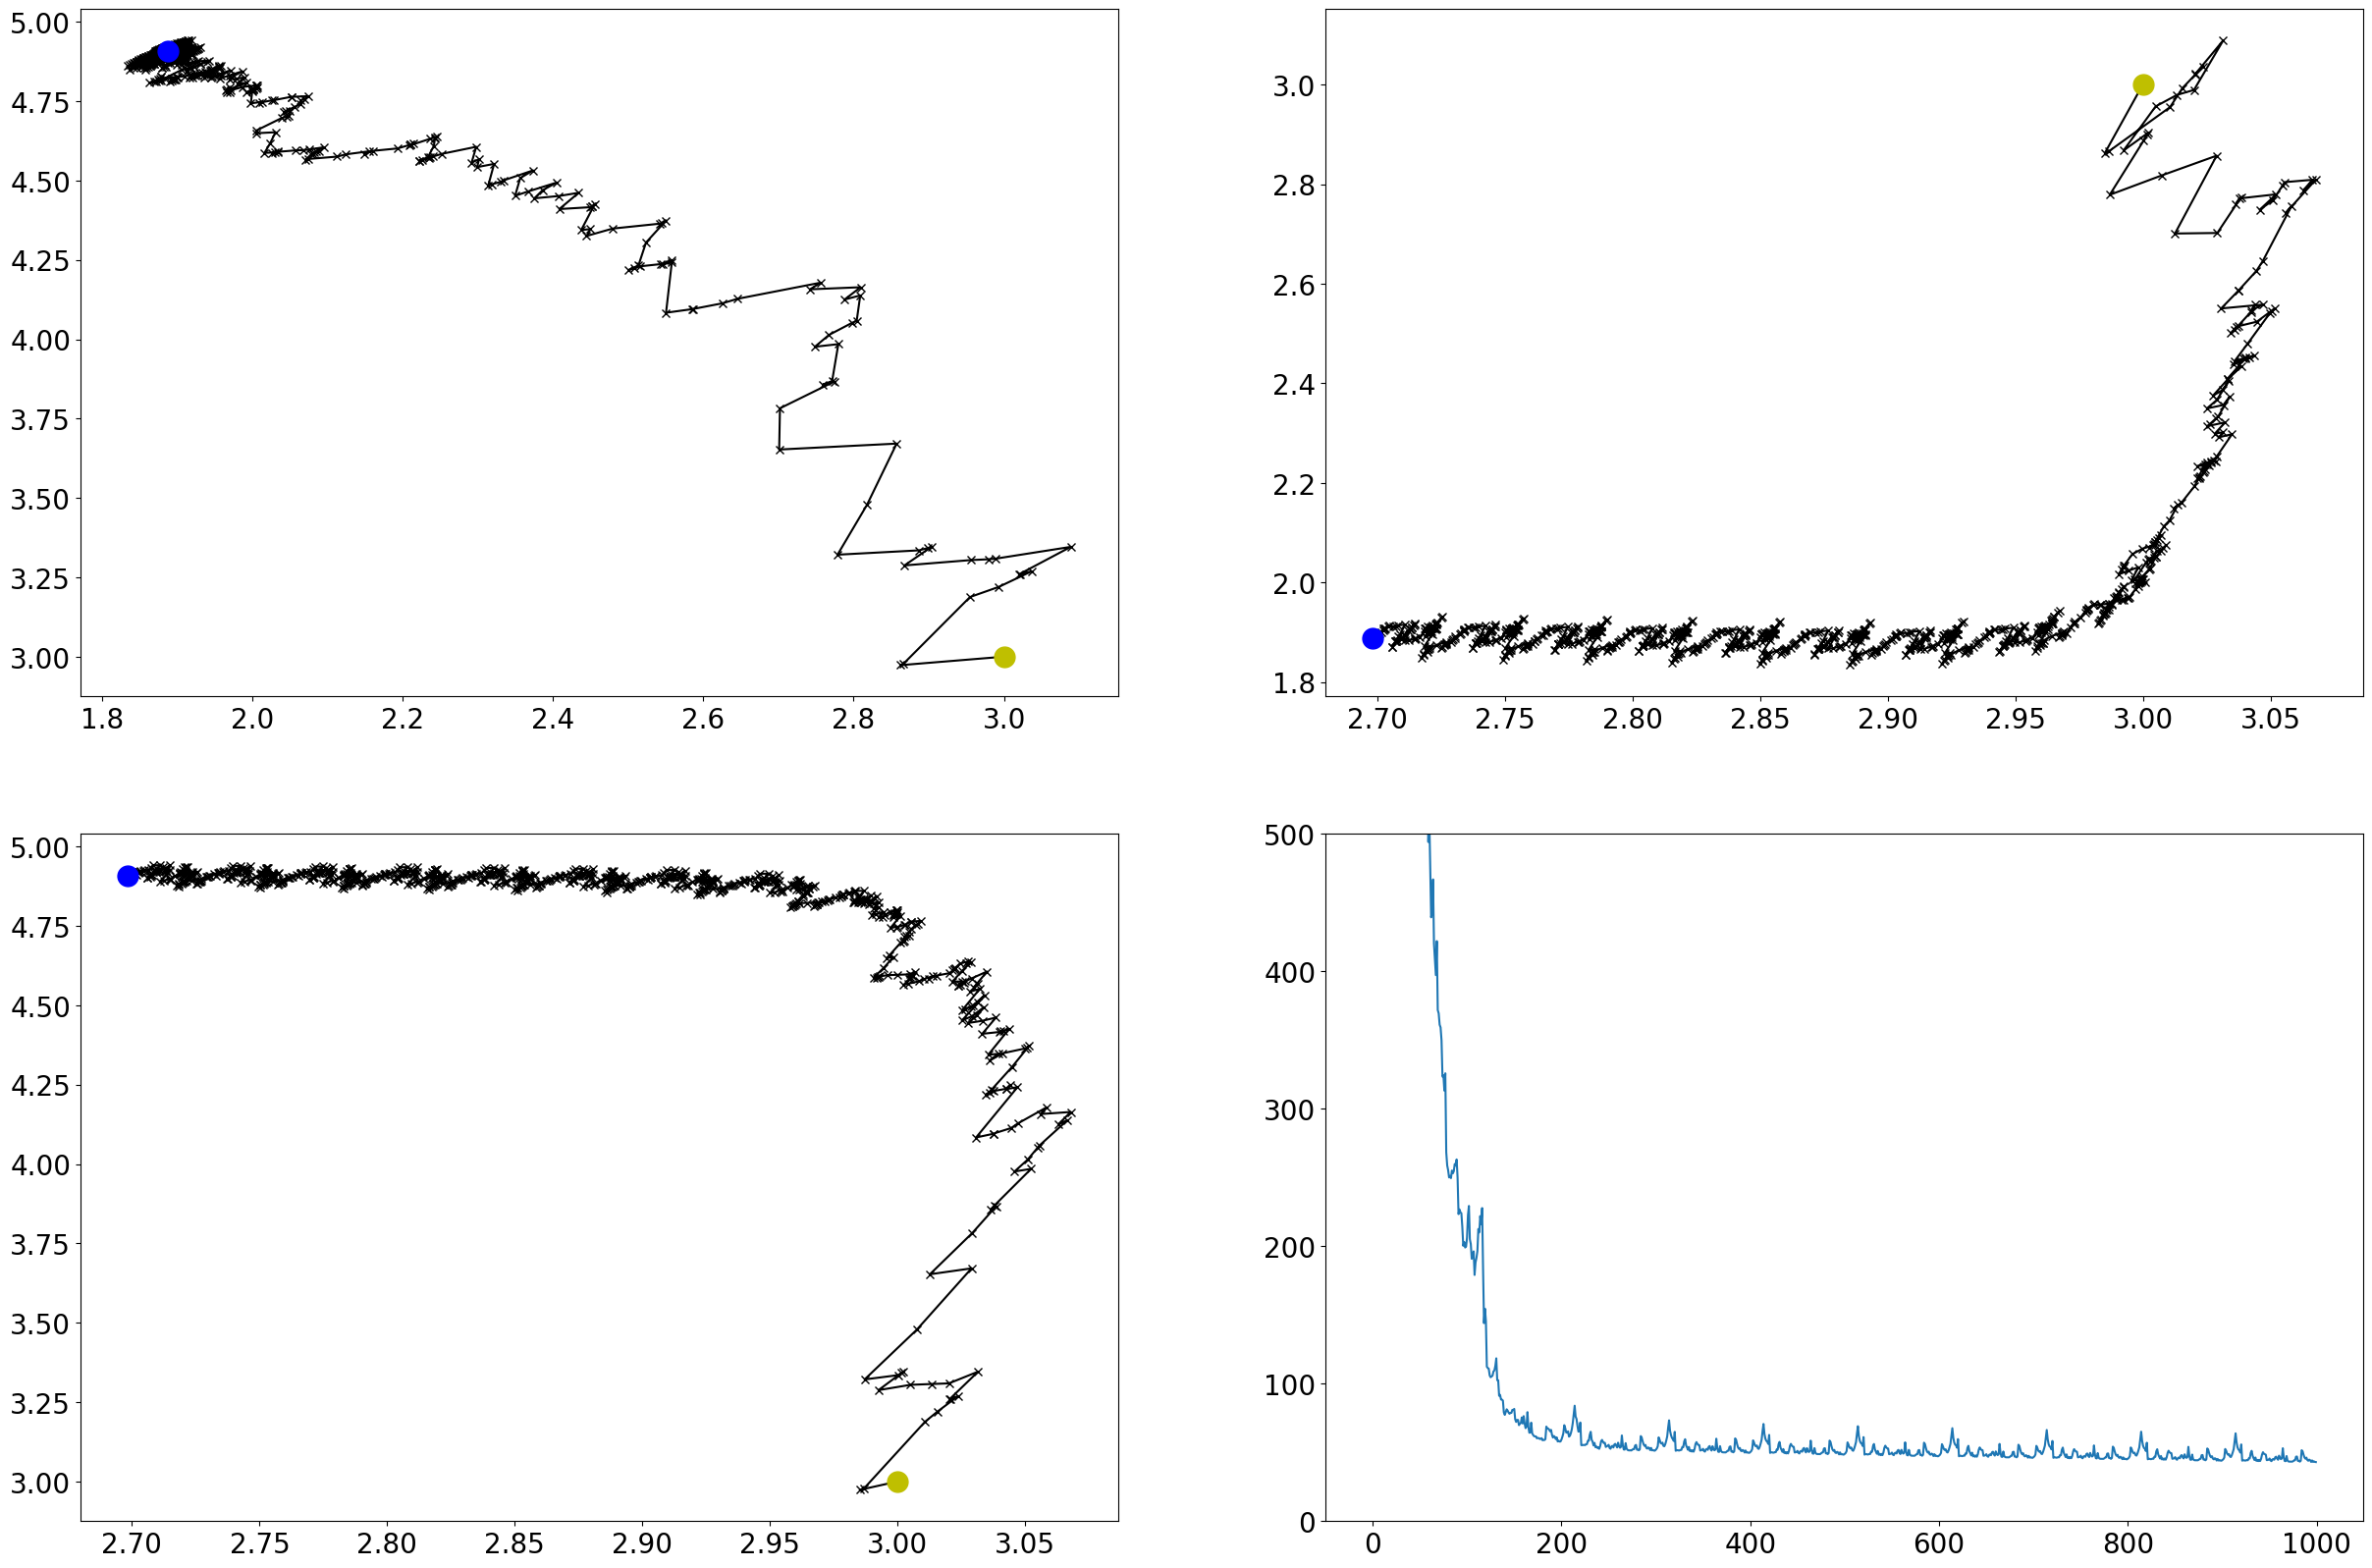

In [51]:
## Parameters to play with
learning_rate = 2e-3
num_iter = 10   # The number of "steps" will be num_iter * numobs
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1, 3))
theta_path[0, :] = theta_initial
loss_vec = np.zeros(num_iter*num_obs)

## Main SGD loop
import random
count = 0
for i in range(num_iter):
    idx = list(range(num_obs))
    # random.shuffle(idx)  # Shuffle the indices to get a random order of observations
    for j in range(num_obs):
        j = idx[j]
        count += 1
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[j] - y[j])*(x_mat[j,:])
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta


## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## 2.ตอบ
### Shuffle - ช่วยให้แก้ปัญหา local minima หรือ bias จากดาต้าตัวแรก ทำให้ robust convergence,better generalize 
### without - shuffle bias จาก dataตัวแรก หรือdata ตัวแรกเป็น noise

## <span style="color: green;">3. (Mini Batch Gradient Descent - 20 คะแนน) ค่าของ batch size มีผลต่อการเทรนโมเดลอย่างไร</span>

# batch = 5

(0.0, 500.0)

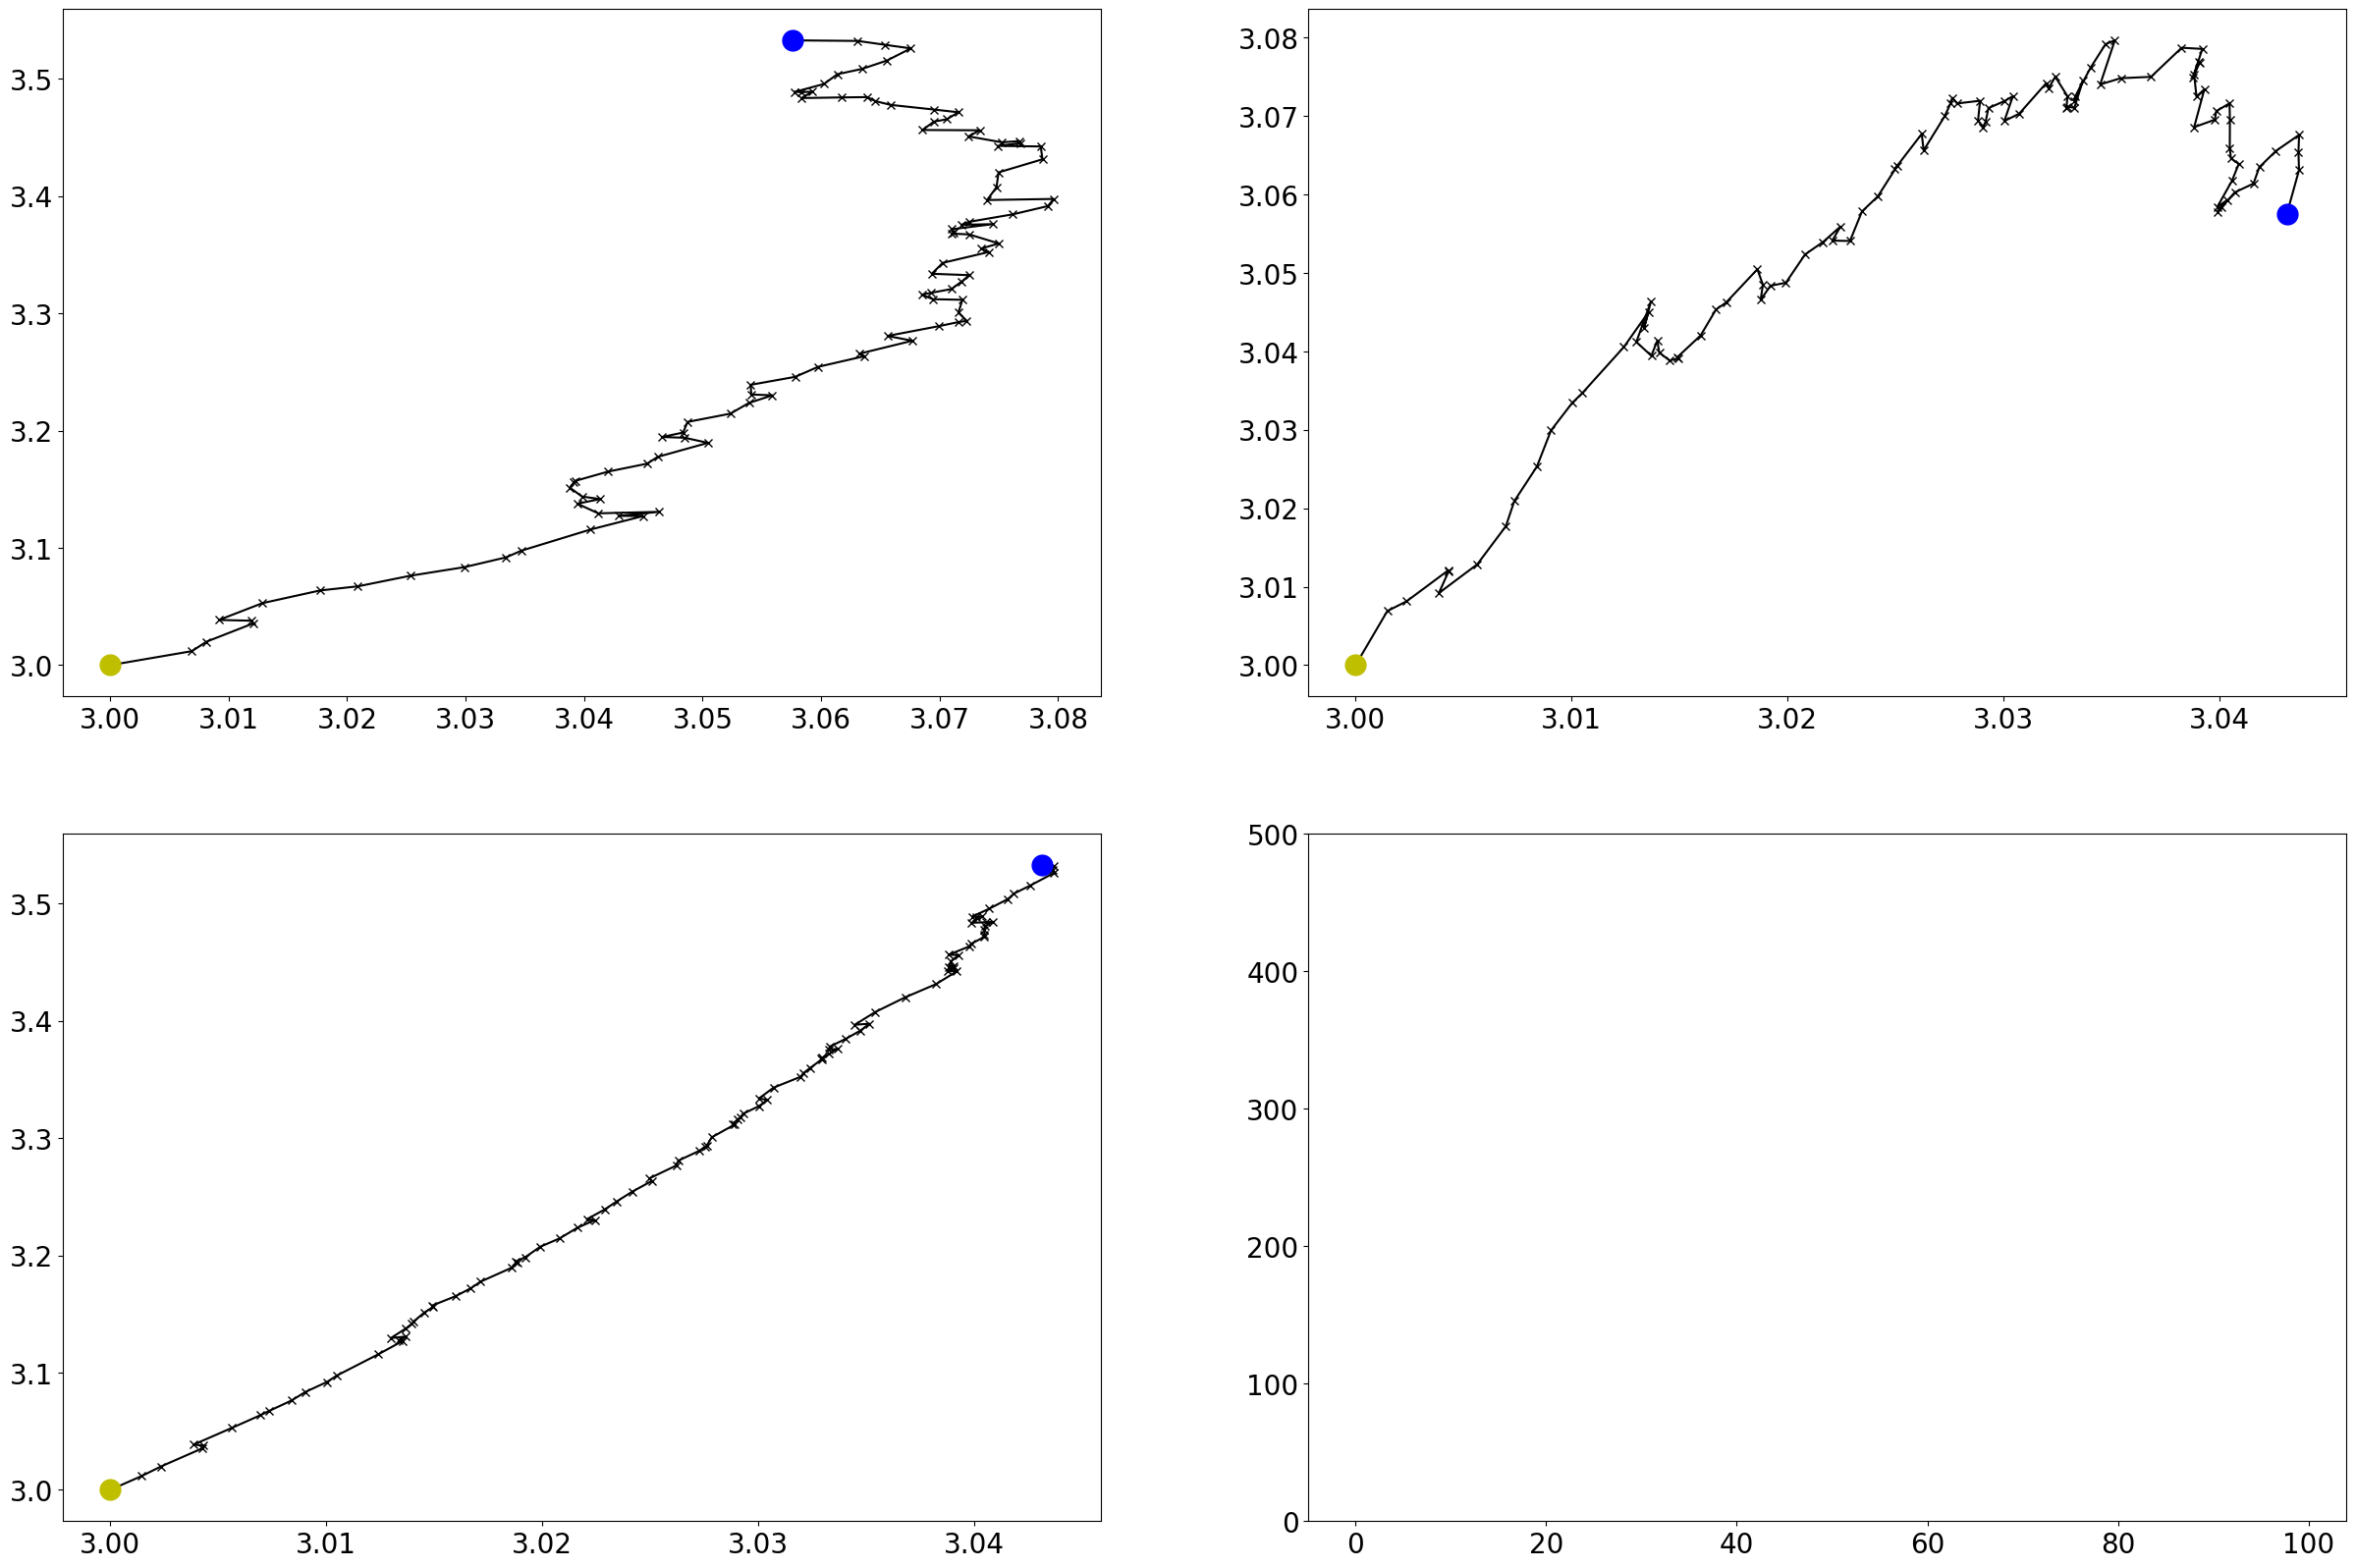

In [54]:
## Parameters to play with
learning_rate = 2e-4
num_iter = 100
batch_size = 5
steps_per_epoch = num_obs // batch_size + int(num_obs % batch_size != 0)
num_epoch = num_iter//steps_per_epoch  # The number of "steps" will be num_iter * num_obs / batch_size
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_epoch*steps_per_epoch)+1, 3))
theta_path[0, :]= theta_initial
loss_vec = np.zeros(num_epoch*steps_per_epoch)

count = 0
idx = np.arange(num_obs)
for i in range(num_epoch):
    np.random.shuffle(idx)
    y     = y[idx]
    x_mat = x_mat[idx]
    for j in range(steps_per_epoch):
        count += 1
        beg = j * batch_size
        end = (j + 1) * batch_size
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[beg:end] - y[beg:end]).dot(x_mat[beg:end, :])/batch_size
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta

## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

#batch = 50

(0.0, 500.0)

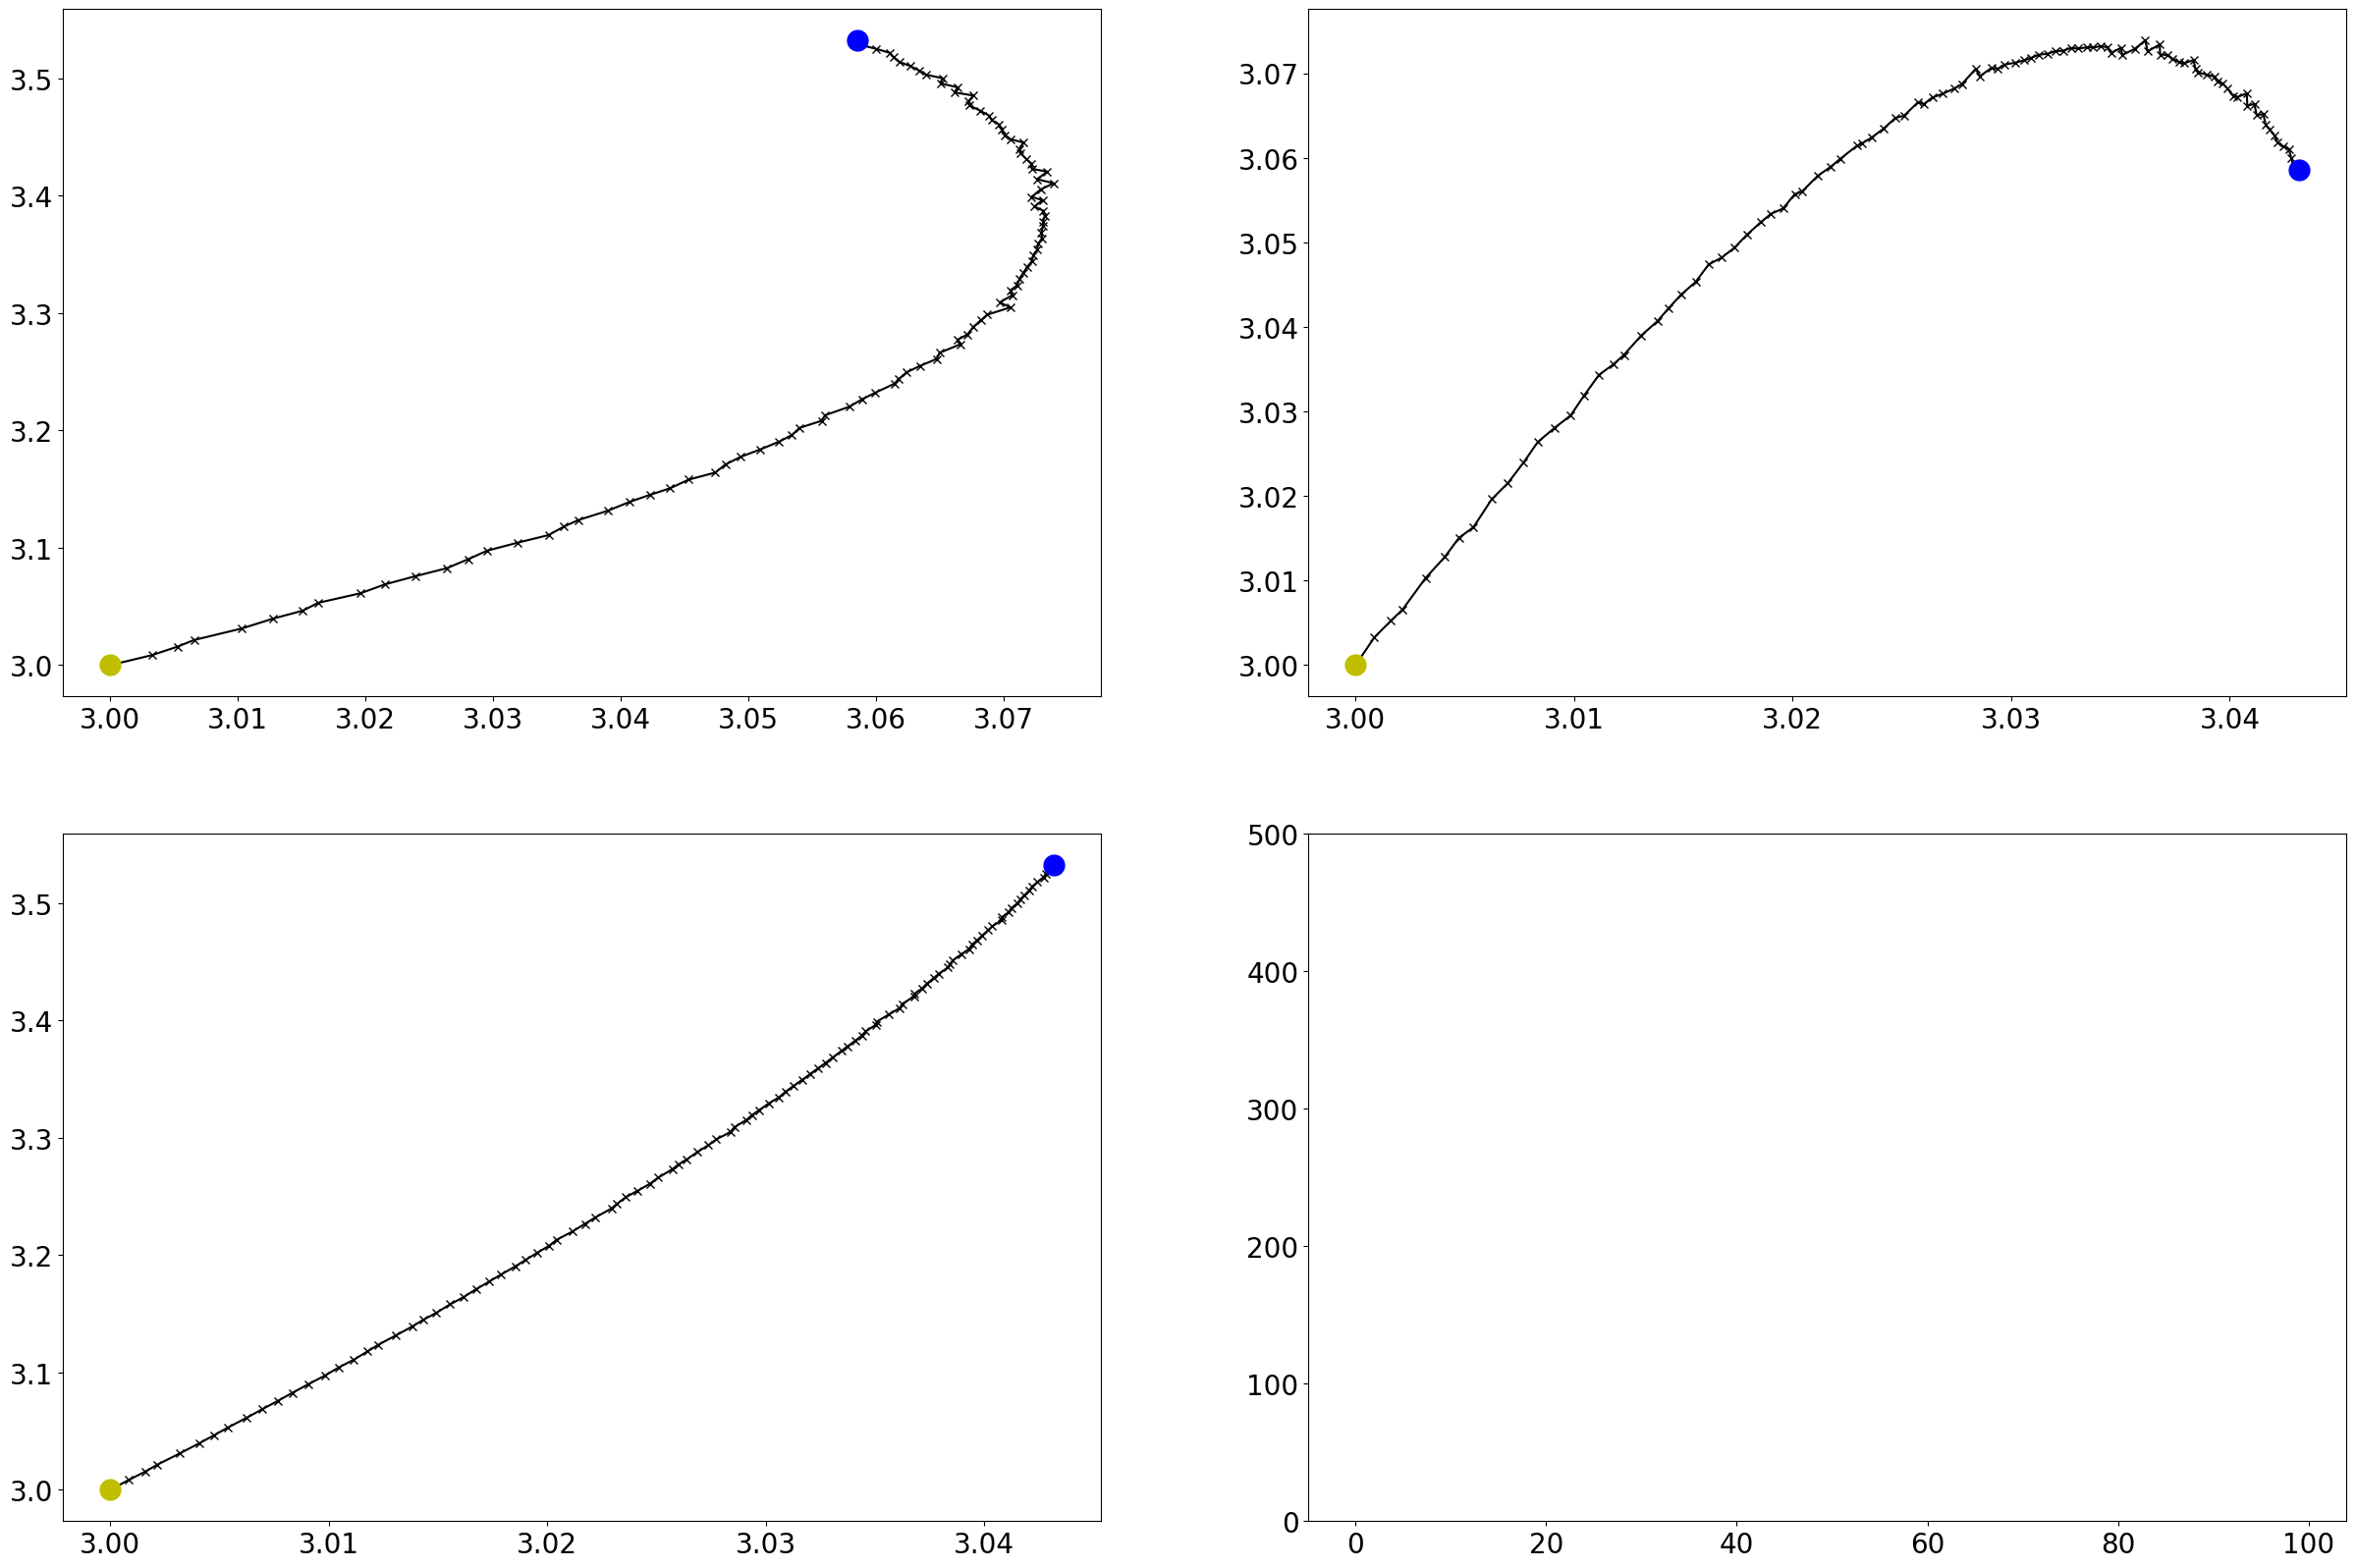

In [60]:
## Parameters to play with
learning_rate = 2e-4
num_iter = 100
batch_size = 50
steps_per_epoch = num_obs // batch_size + int(num_obs % batch_size != 0)
num_epoch = num_iter//steps_per_epoch  # The number of "steps" will be num_iter * num_obs / batch_size
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_epoch*steps_per_epoch)+1, 3))
theta_path[0, :]= theta_initial
loss_vec = np.zeros(num_epoch*steps_per_epoch)

count = 0
idx = np.arange(num_obs)
for i in range(num_epoch):
    np.random.shuffle(idx)
    y     = y[idx]
    x_mat = x_mat[idx]
    for j in range(steps_per_epoch):
        count += 1
        beg = j * batch_size
        end = (j + 1) * batch_size
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[beg:end] - y[beg:end]).dot(x_mat[beg:end, :])/batch_size
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta

## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## 3.ตอบ
### large batch - กลายเป็น GD,ปรับ weight ดีเนื่องจากเอา average จาก data ใน batch, ปรับน้อย, use more memory, faster,บางครั้ง generalize แย่กว่า, ติด local minima เพราะaverage จาก large batch size
### small batch - กลายเป็น SGD,สามารถ ออกจาก local minima, ปรับเยอะ, use less memory, slow

## <span style="color: green;">4. (Mini Batch Gradient Descent - 20 คะแนน) จำนวน epoch ที่สูงหรือต่ำจนเกินไป มีผลต่อการเทรนโมเดลอย่างไร</span>

# epoch น้อย

(0.0, 500.0)

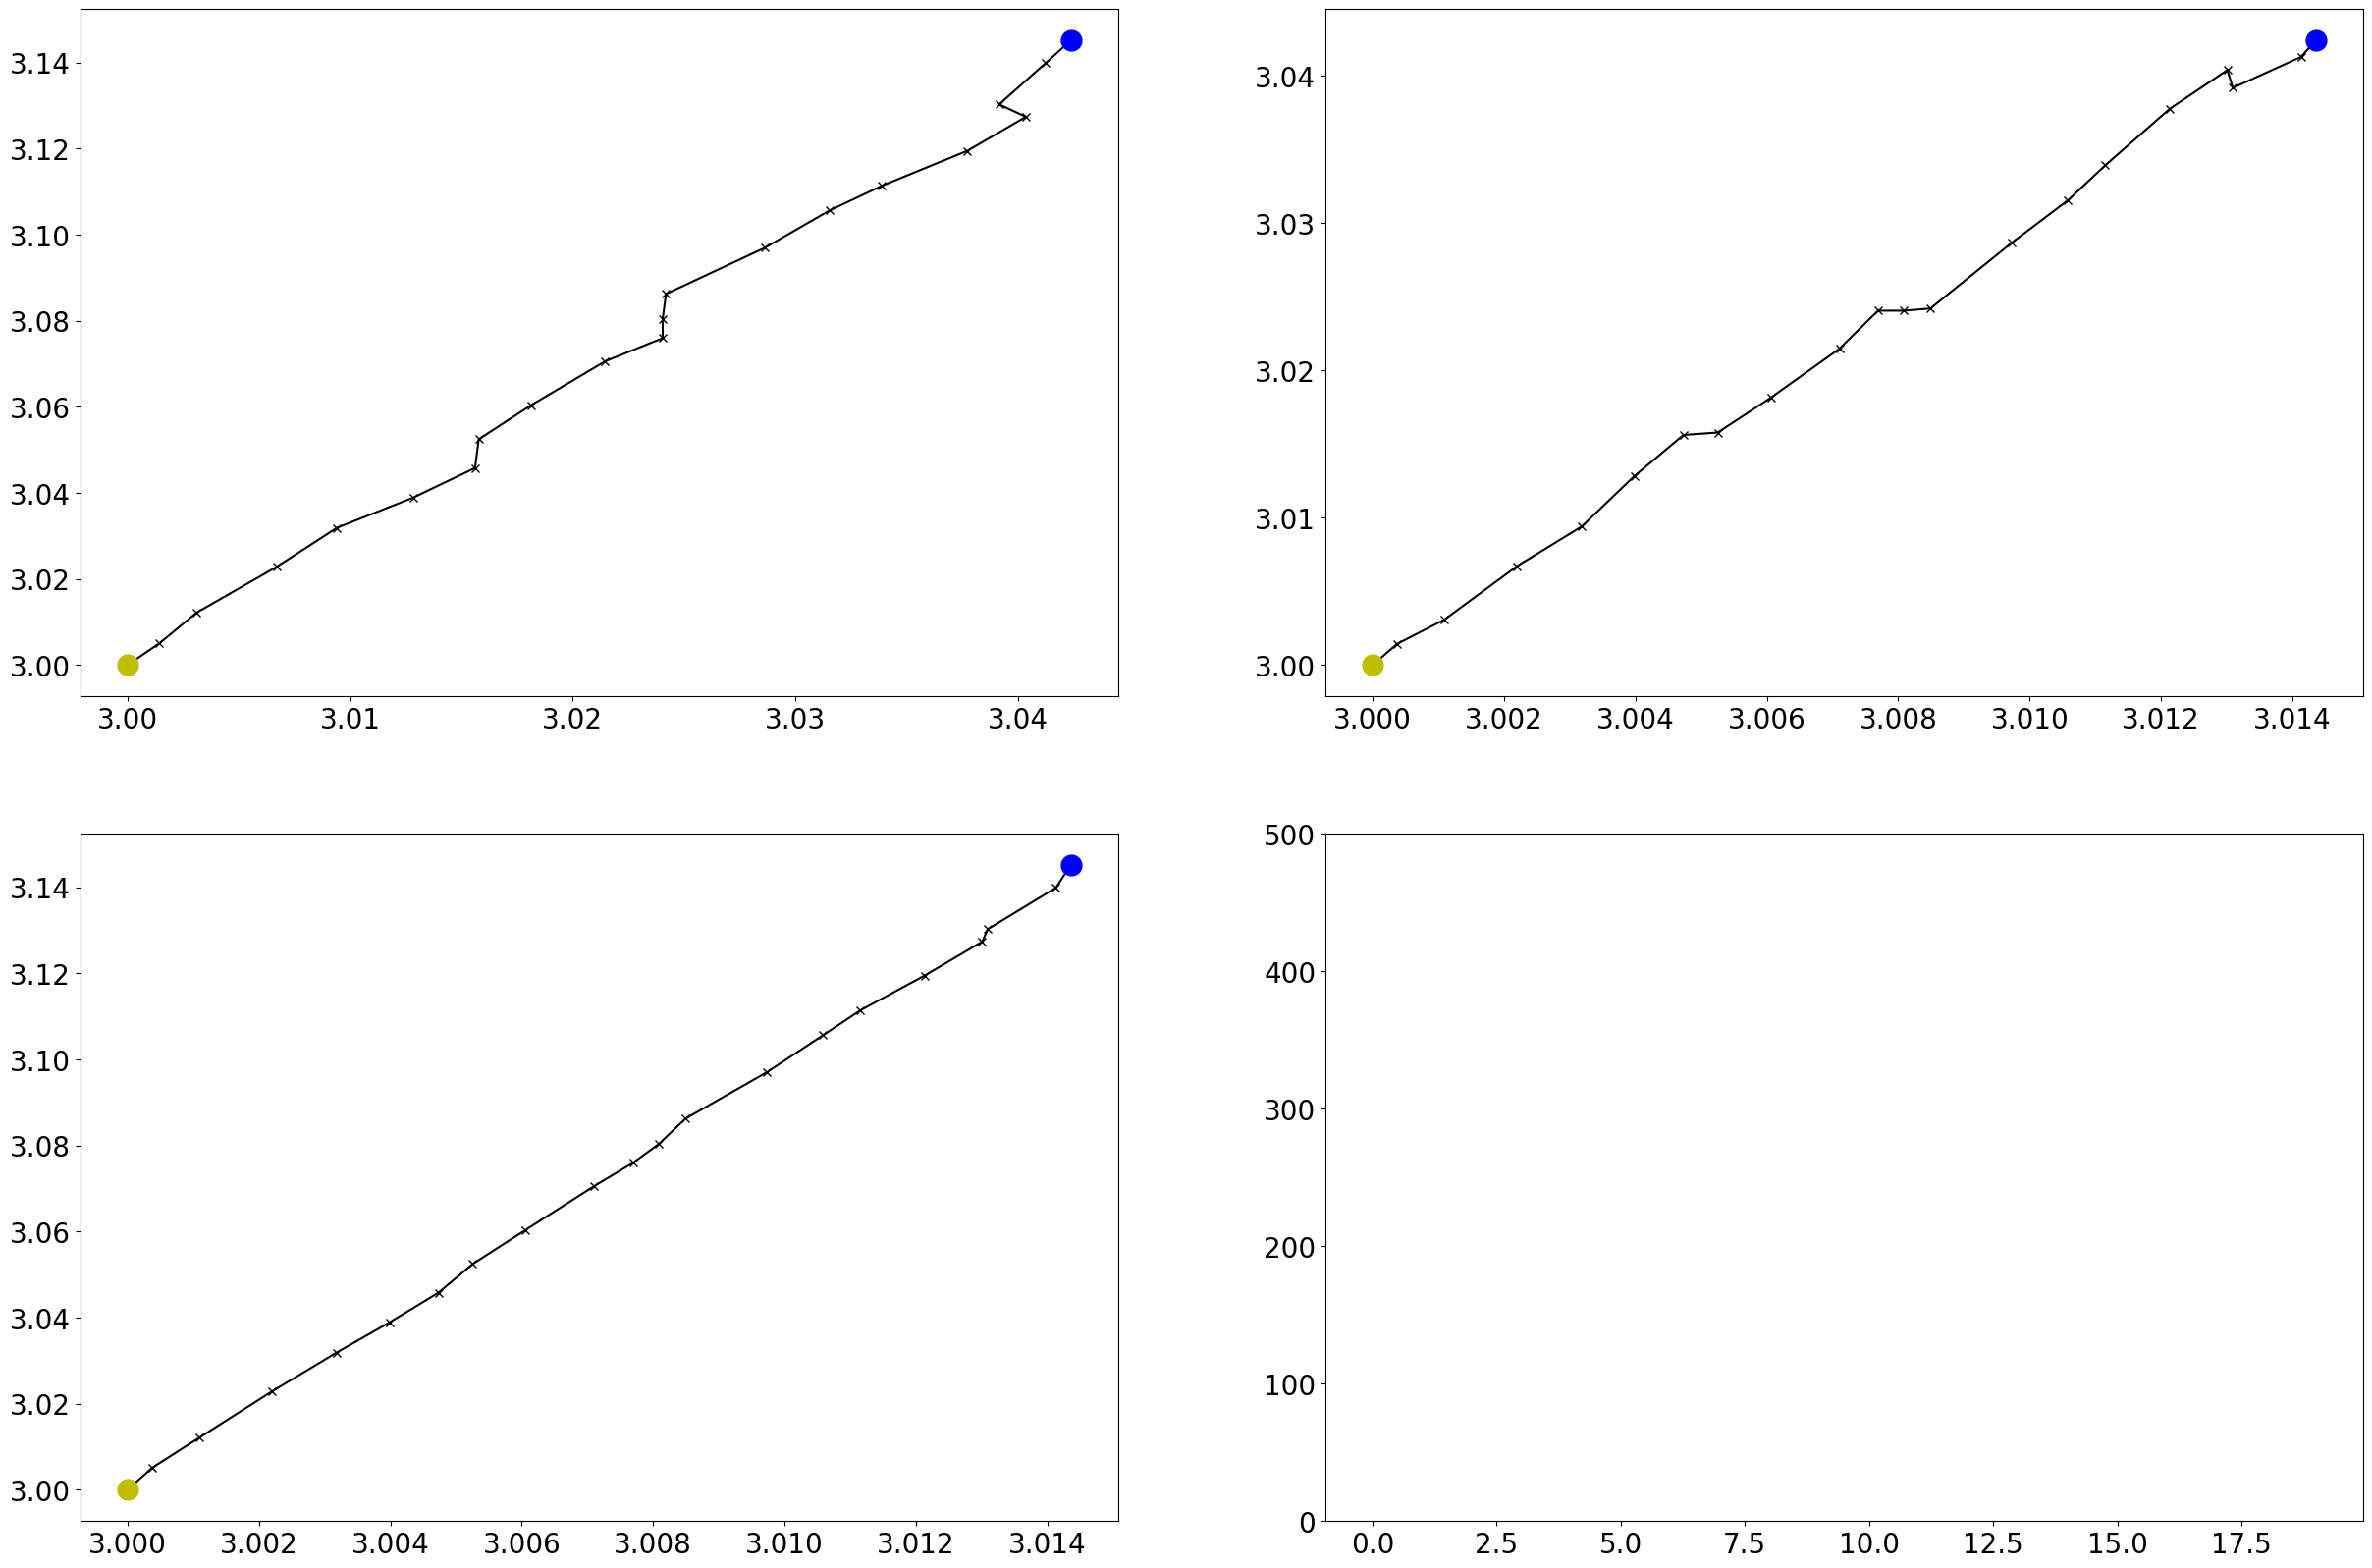

In [61]:
## Parameters to play with
learning_rate = 2e-4
num_iter = 20
batch_size = 20
steps_per_epoch = num_obs // batch_size + int(num_obs % batch_size != 0)
num_epoch = num_iter//steps_per_epoch  # The number of "steps" will be num_iter * num_obs / batch_size
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_epoch*steps_per_epoch)+1, 3))
theta_path[0, :]= theta_initial
loss_vec = np.zeros(num_epoch*steps_per_epoch)

count = 0
idx = np.arange(num_obs)
for i in range(num_epoch):
    np.random.shuffle(idx)
    y     = y[idx]
    x_mat = x_mat[idx]
    for j in range(steps_per_epoch):
        count += 1
        beg = j * batch_size
        end = (j + 1) * batch_size
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[beg:end] - y[beg:end]).dot(x_mat[beg:end, :])/batch_size
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta

## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

# epoch มาก

(0.0, 500.0)

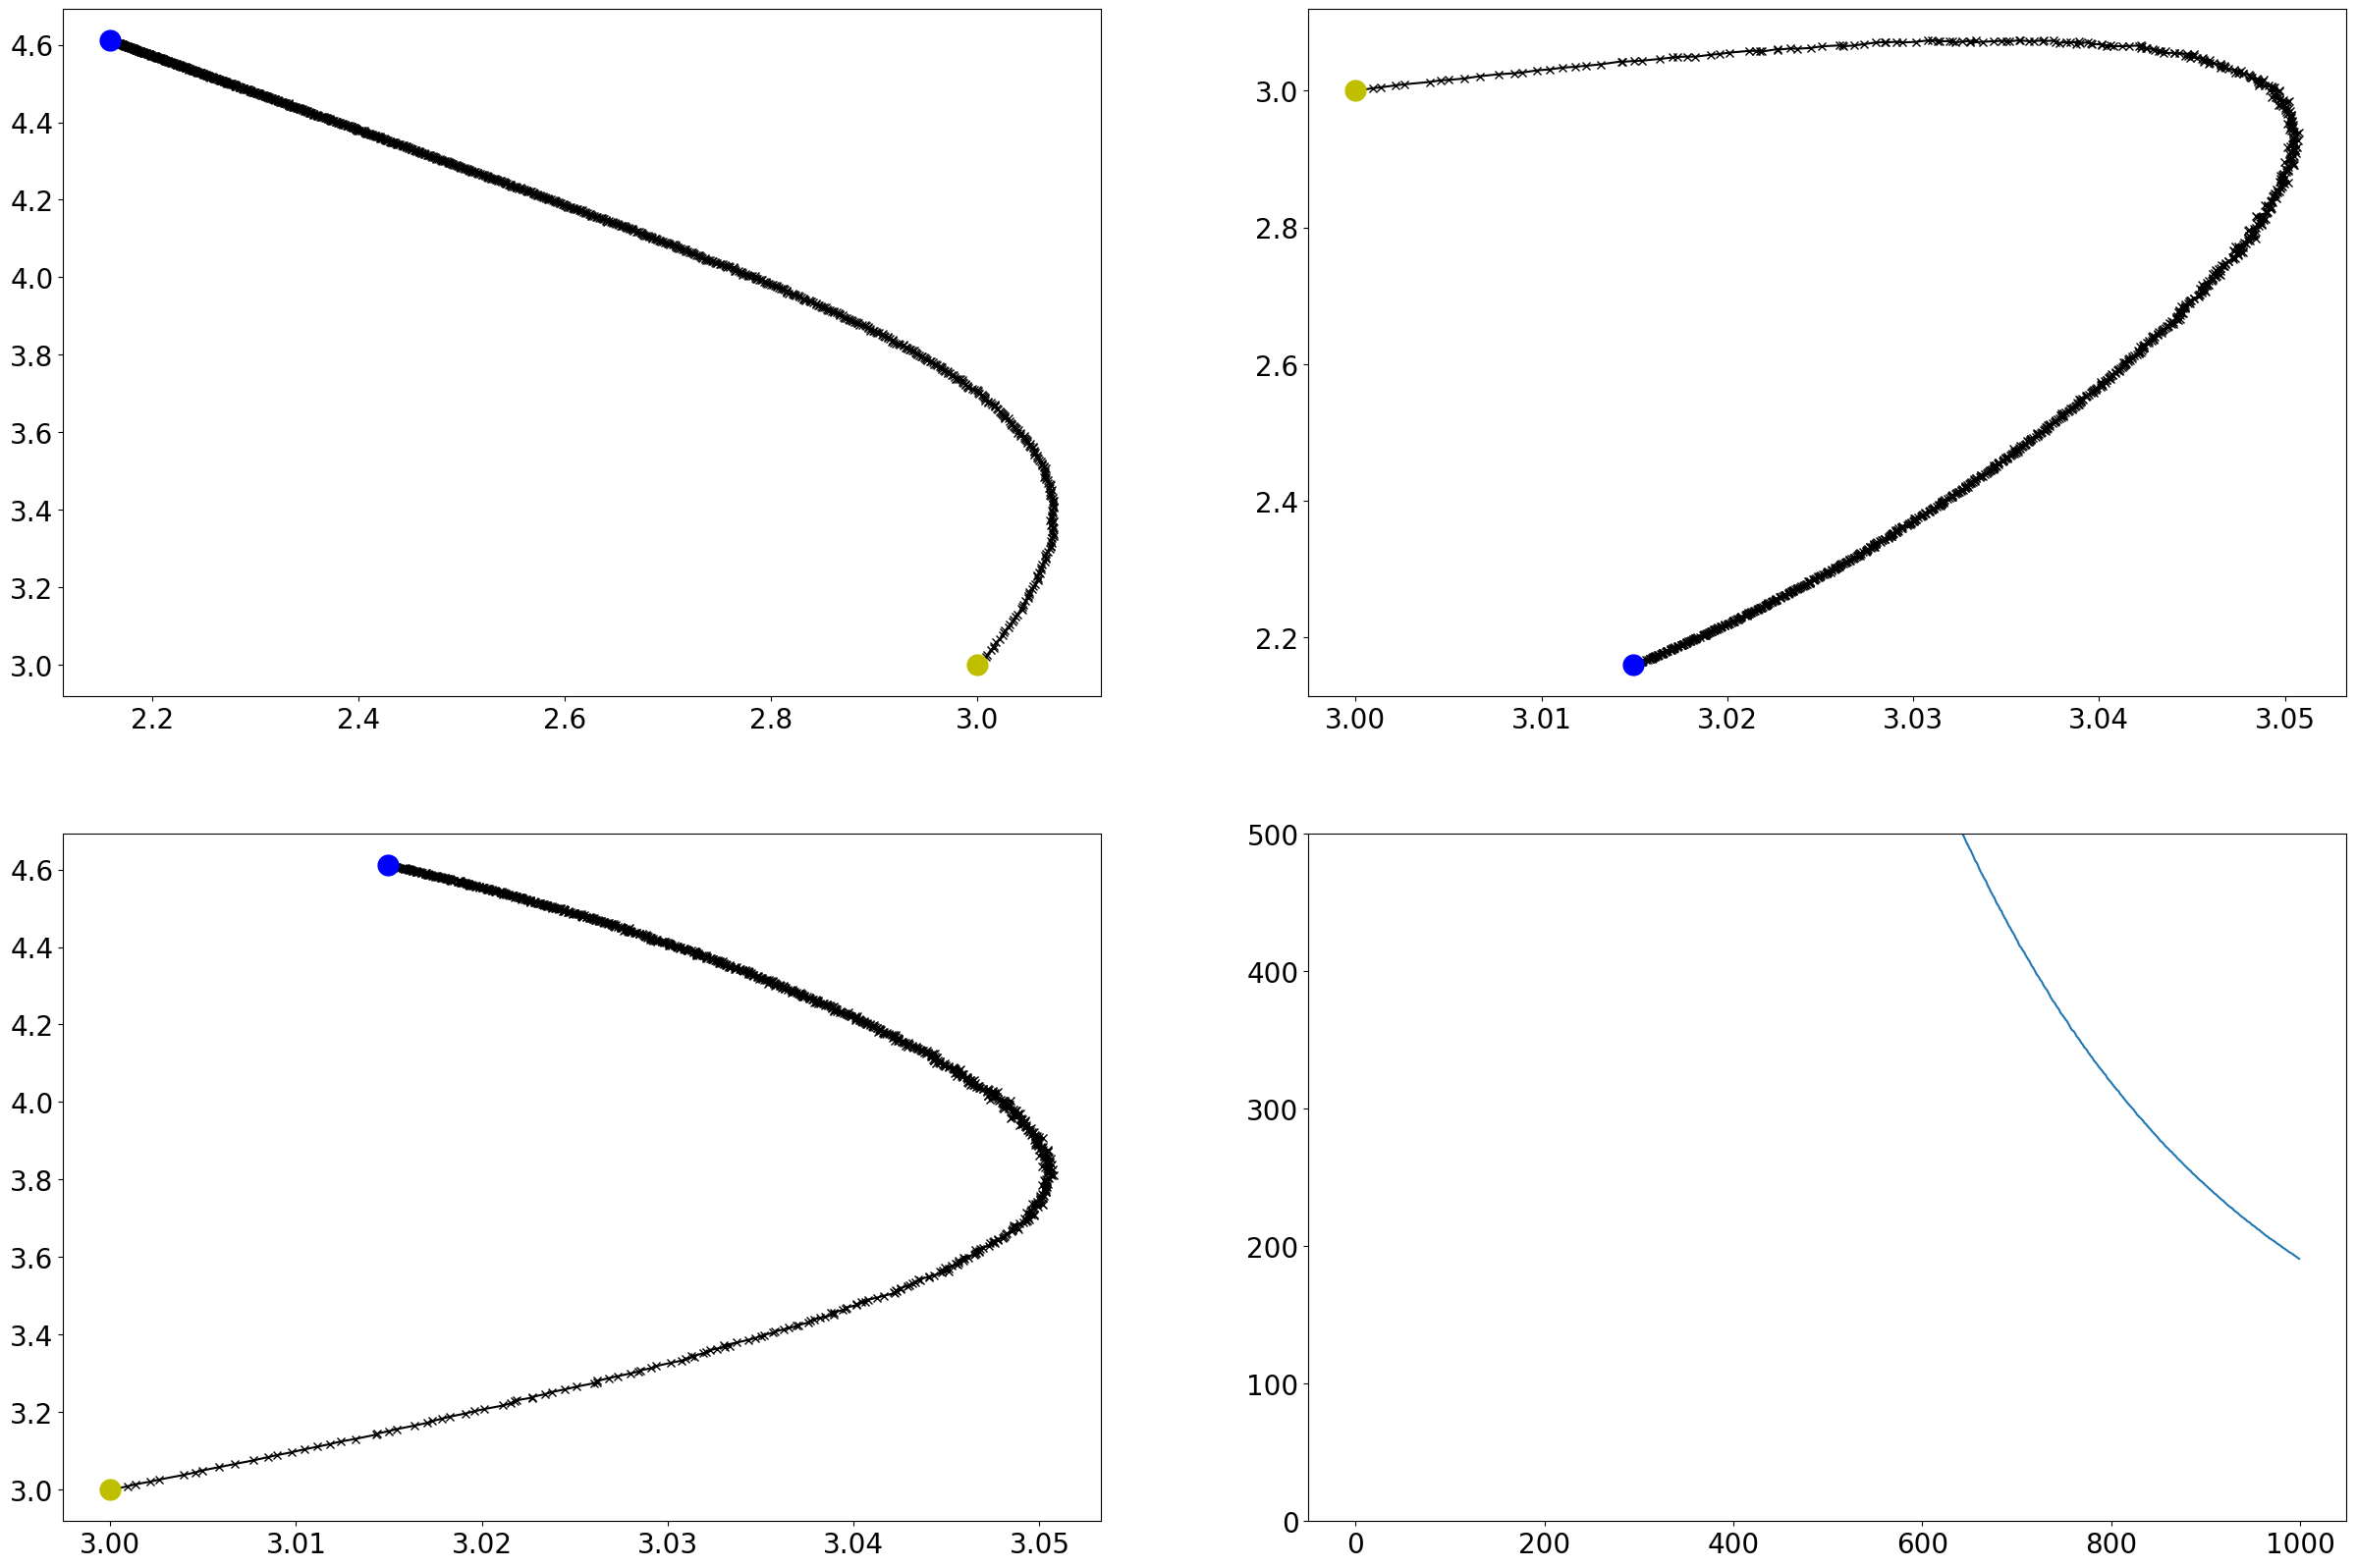

In [62]:
## Parameters to play with
learning_rate = 2e-4
num_iter = 1000
batch_size = 20
steps_per_epoch = num_obs // batch_size + int(num_obs % batch_size != 0)
num_epoch = num_iter//steps_per_epoch  # The number of "steps" will be num_iter * num_obs / batch_size
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_epoch*steps_per_epoch)+1, 3))
theta_path[0, :]= theta_initial
loss_vec = np.zeros(num_epoch*steps_per_epoch)

count = 0
idx = np.arange(num_obs)
for i in range(num_epoch):
    np.random.shuffle(idx)
    y     = y[idx]
    x_mat = x_mat[idx]
    for j in range(steps_per_epoch):
        count += 1
        beg = j * batch_size
        end = (j + 1) * batch_size
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y_pred - y)**2)
        grad_vec = (y_pred[beg:end] - y[beg:end]).dot(x_mat[beg:end, :])/batch_size
        theta = theta - learning_rate*grad_vec
        theta_path[count, :] = theta

## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

## 4. ตอบ
### Few epochs - underfitting, high bias model ไม่ complex, low acc, high loss, ไม่ลู่เข้า
### many epochs - overfitting, high variance model complex เกินไป, ดีใน train แย่ใน test, ไม่ generalize